In [1]:
import numpy as np
from scipy.stats import multivariate_normal     # for generating pdf
import random
import matplotlib.pyplot as plt



def em_alg(samples, iterations, k):





    means = np.zeros((k, samples.shape[1]))
    cov = np.zeros((k, 2, 2))
    n_samples = len(samples)
    pi_k = np.zeros((k, 1))

    for i in range(k):
        means[i] = random.choice(samples)
        cov[i] = np.cov(np.transpose(samples))
        pi_k[i] = 1/(k+1)


    for n in range(iterations):

        #E-Step
        r_nk = np.zeros((n_samples, k))
        for s in range(k):
            r_nk[:, s] = pi_k[s] * multivariate_normal.pdf(samples, means[s], cov[s])
        r_nk /= np.sum(r_nk, axis =1, keepdims=True)



        #M-Step
        R_k = np.sum(r_nk, axis=0)
        pi_k = R_k / n_samples
        for y in range(k):
            means[y] = np.sum(r_nk[:, y].reshape((-1, 1)) * samples, axis=0) / R_k[y]
            diff = samples - means[y]
            cov[y] = (r_nk[:, y].reshape((-1, 1, 1)) * np.matmul(diff[:, :, np.newaxis], diff[:, np.newaxis, :])).sum(axis=0) / R_k[y]



     
        
        #Plot
        if((n +1)%(iterations/10) == 0 or n==2 or n==5):
            x1 = np.linspace(-4,11,200)  
            x2 = np.linspace(-4,11,200)
            X, Y = np.meshgrid(x1,x2)
            pos = np.empty(X.shape + (2,))                # a new array of given shape and type, without initializing entries
            pos[:, :, 0] = X; pos[:, :, 1] = Y  

                
            
            plt.figure(figsize=(10,10))                                                          # creating the figure and assigning the size
            plt.scatter(samples[:,0], samples[:,1], marker='o')  

            for c in range(k):
                plt.contour(X, Y, multivariate_normal(means[c], cov[c]).pdf(pos), colors="r", alpha = 0.5) 
         
            plt.axis('equal')                                                                  # making both the axis equal
            plt.xlabel('X-Axis', fontsize=16)                                                  # X-Axis
            plt.ylabel('Y-Axis', fontsize=16)                                                  # Y-Axis
            plt.title('Iteration ' +str(n), fontsize=22)                                            # Title of the plot
            plt.grid()                                                                         # displaying gridlines
            plt.show()





### a) ###


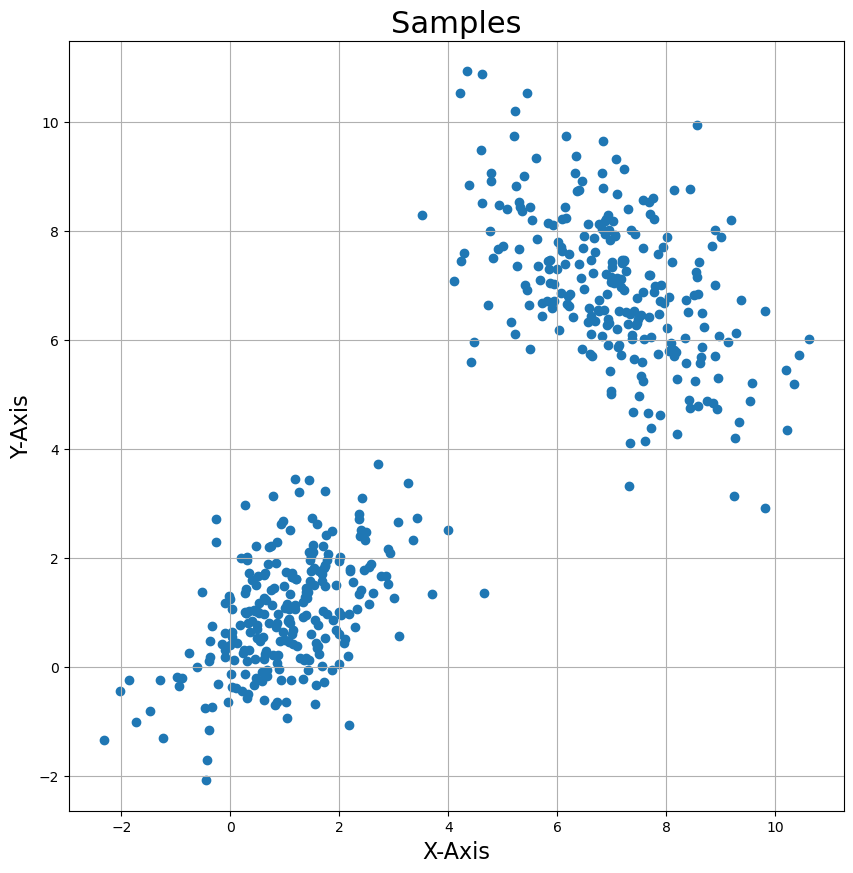

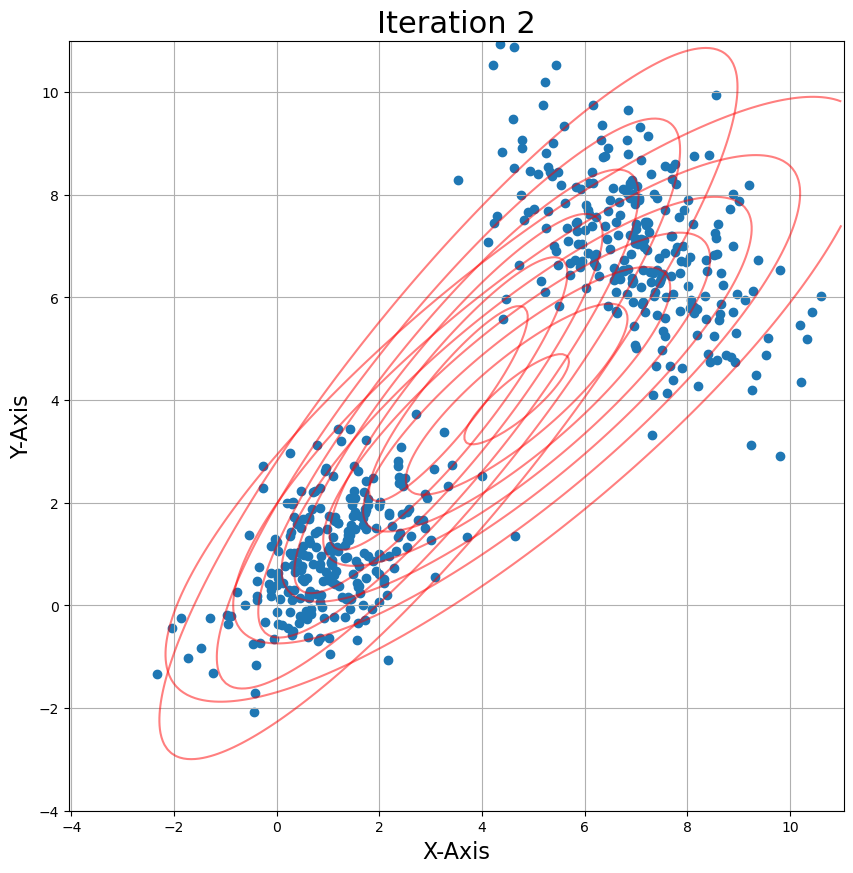

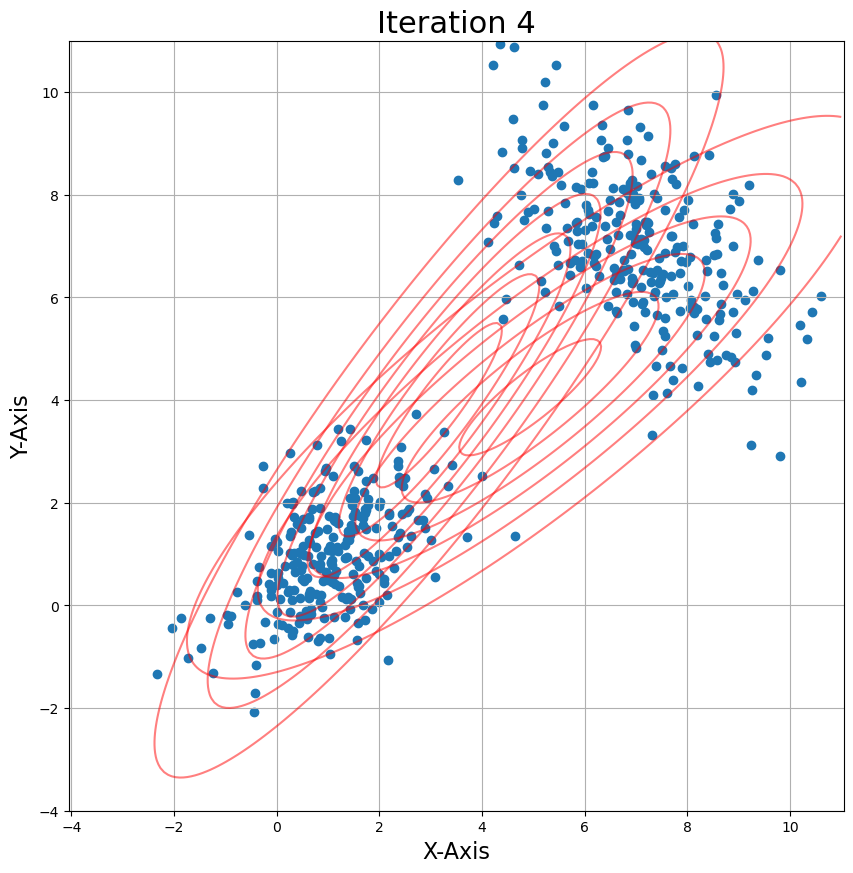

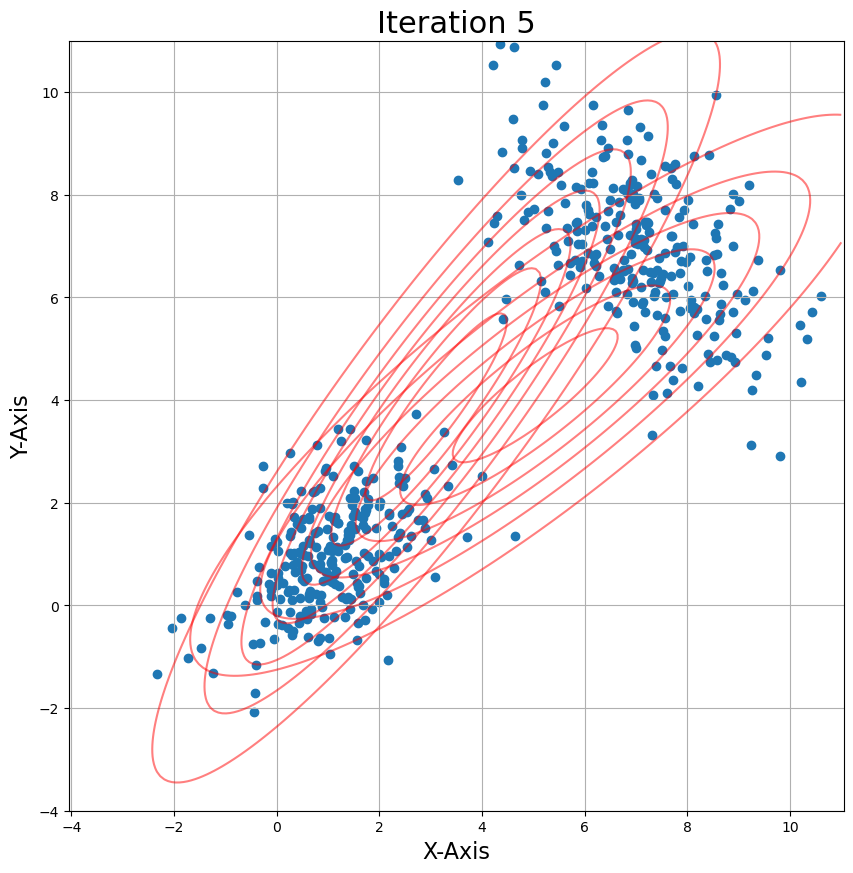

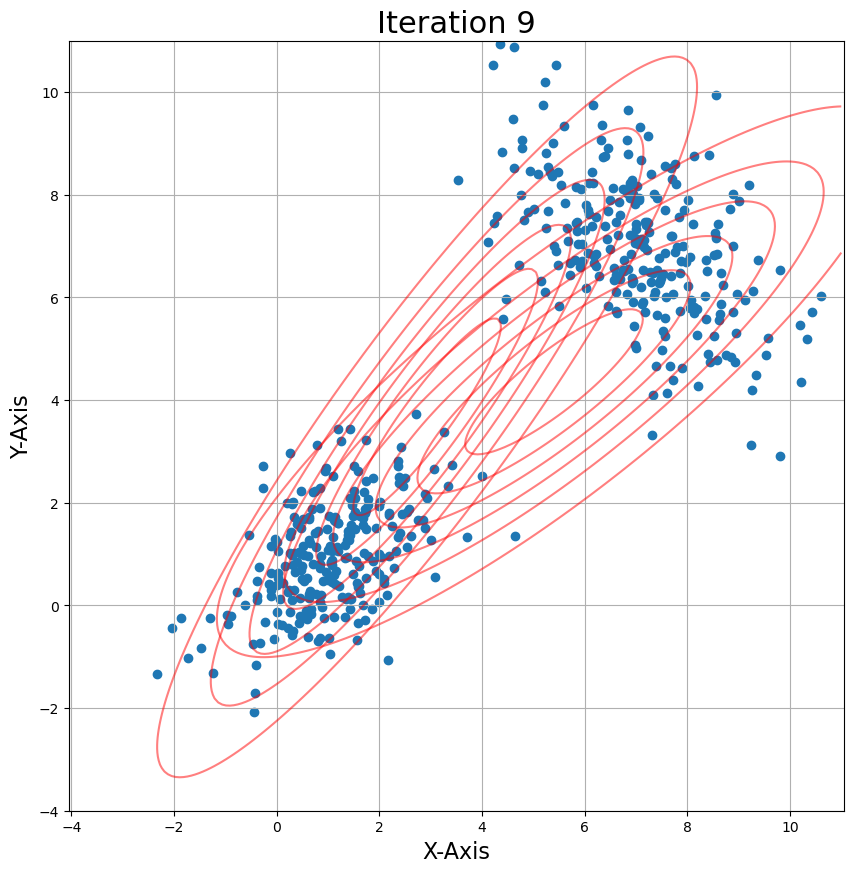

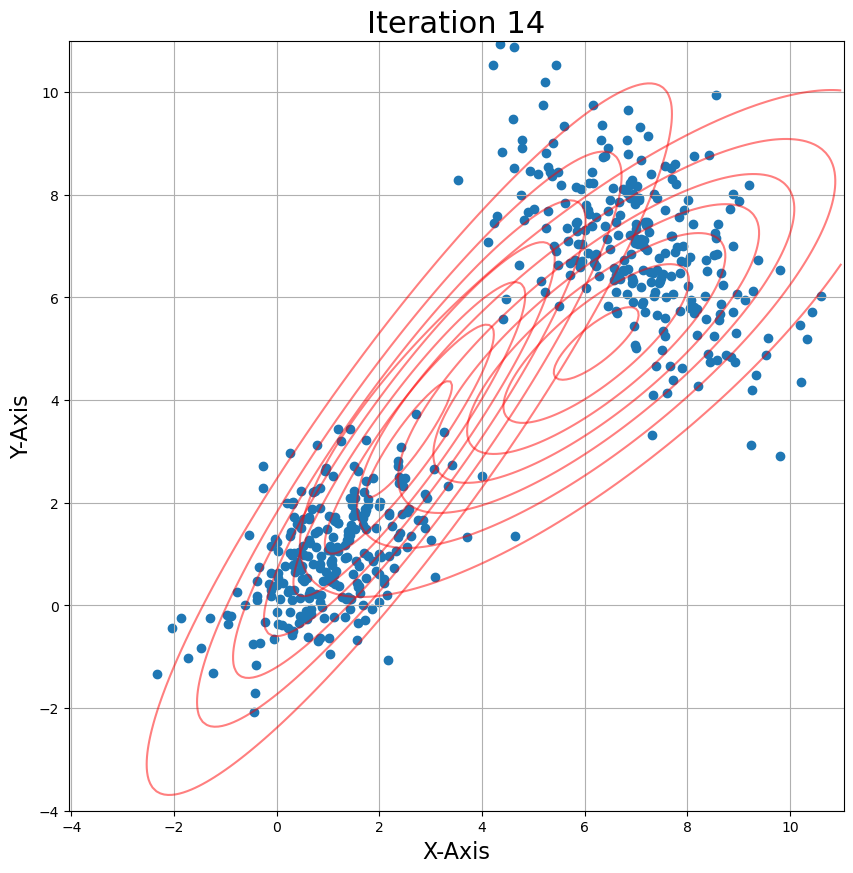

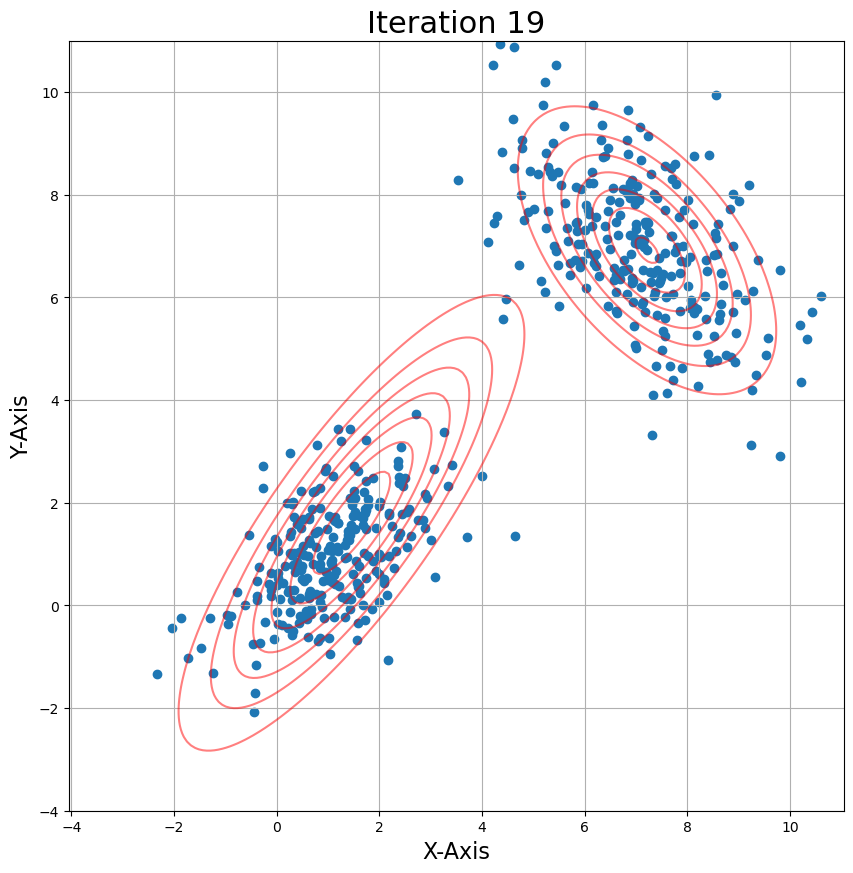

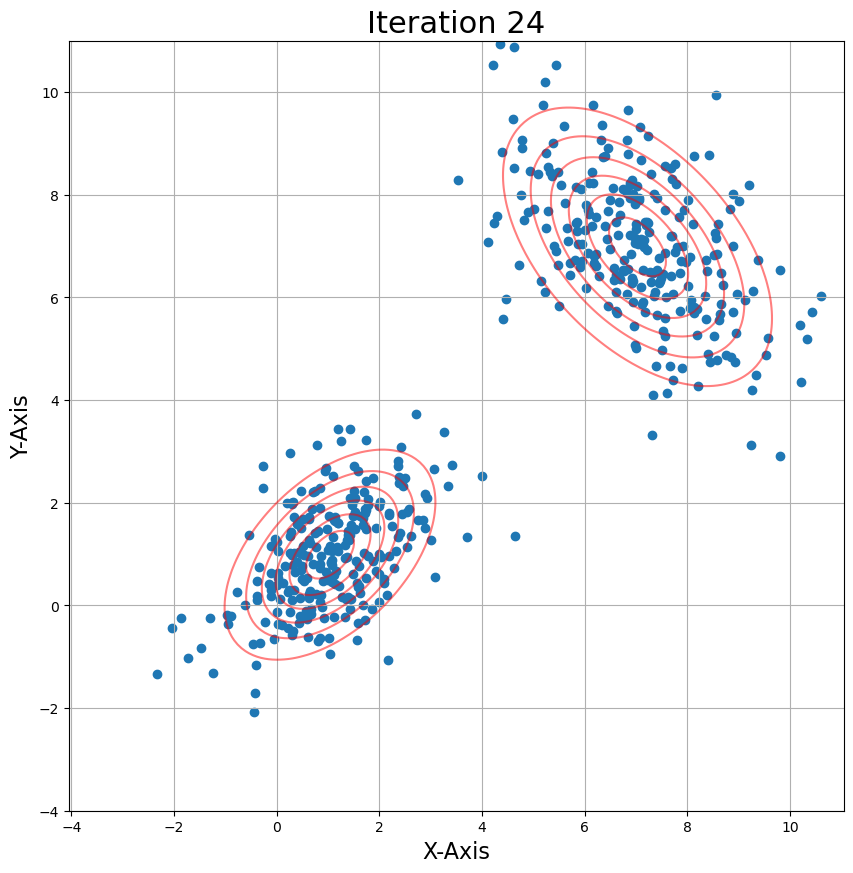

In [2]:
set_means = [[1, 1], [7, 7]]
set_cov = [[[1, 0.5], [0.5, 1]], [[2, -1], [-1, 2]]]
iterations = 25
k = 2
sample_size = 250

x = np.empty(np.shape(set_means))

for i in range(len(set_means)):
    x  = np.random.multivariate_normal(set_means[i], set_cov[i], size = sample_size)
    if i == 0:
        samples = np.empty(np.shape(set_means))
    samples = np.concatenate((samples, x), axis=0)


plt.figure(figsize=(10,10))                                 
plt.scatter(samples[:,0], samples[:,1], marker='o')     
plt.axis('equal')                                  
plt.xlabel('X-Axis', fontsize=16)              
plt.ylabel('Y-Axis', fontsize=16)                     
plt.title('Samples', fontsize=22)    
plt.grid()            
plt.show()

em_alg(samples, iterations, k)


### b) ###
Yes, sometimes it diverges faster sometimes slower

C:\Users\meikf\AppData\Local\Temp\ipykernel_17948\3237318975.py:10: RuntimeWarning: covariance is not symmetric positive-semidefinite.
  x  = np.random.multivariate_normal(set_means[i], set_cov[i], size = sample_size)


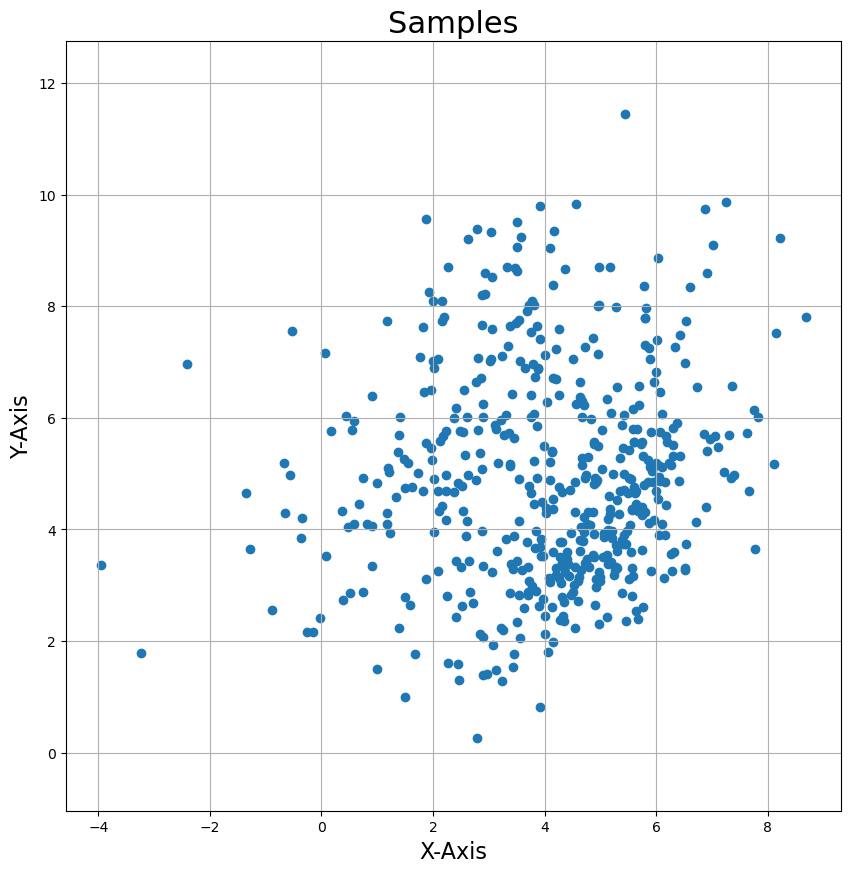

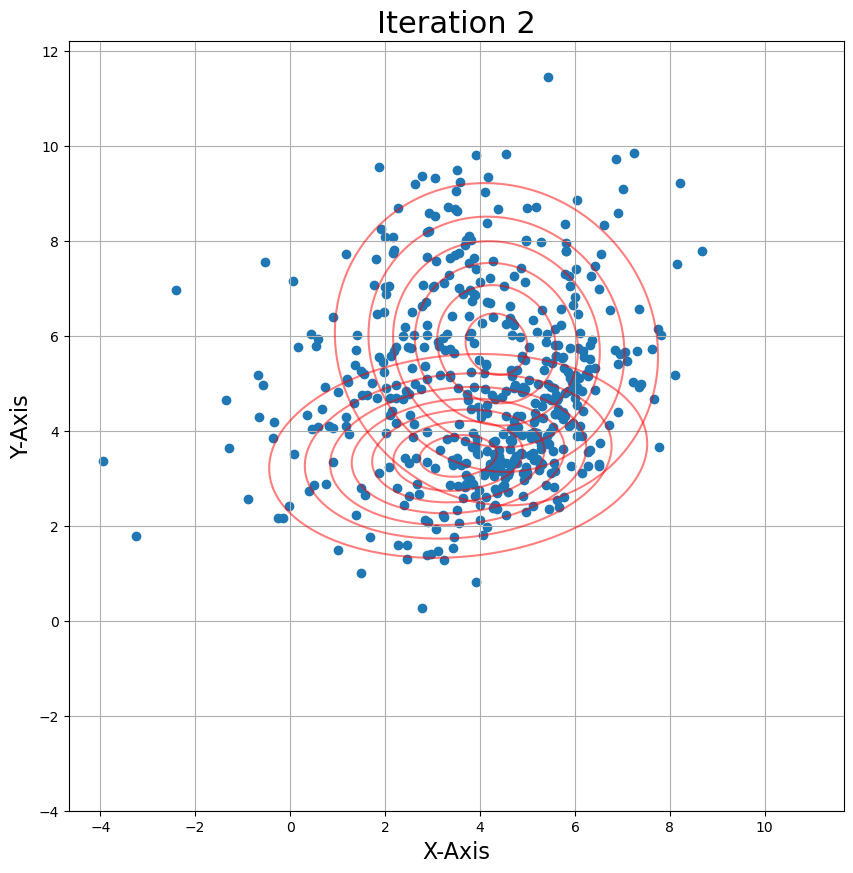

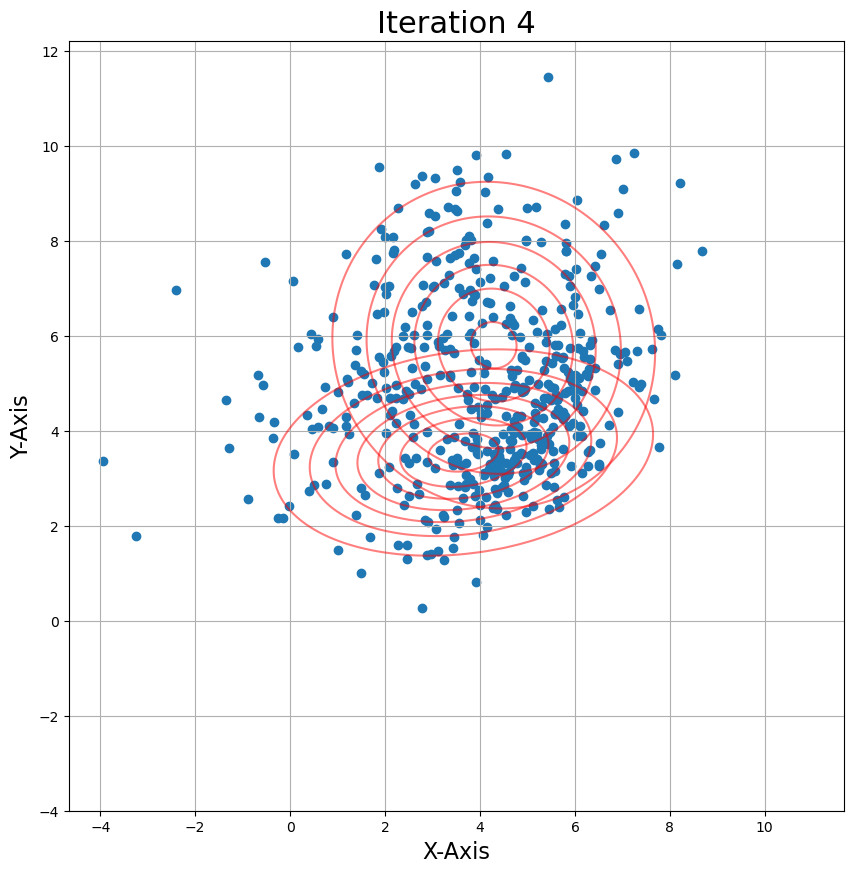

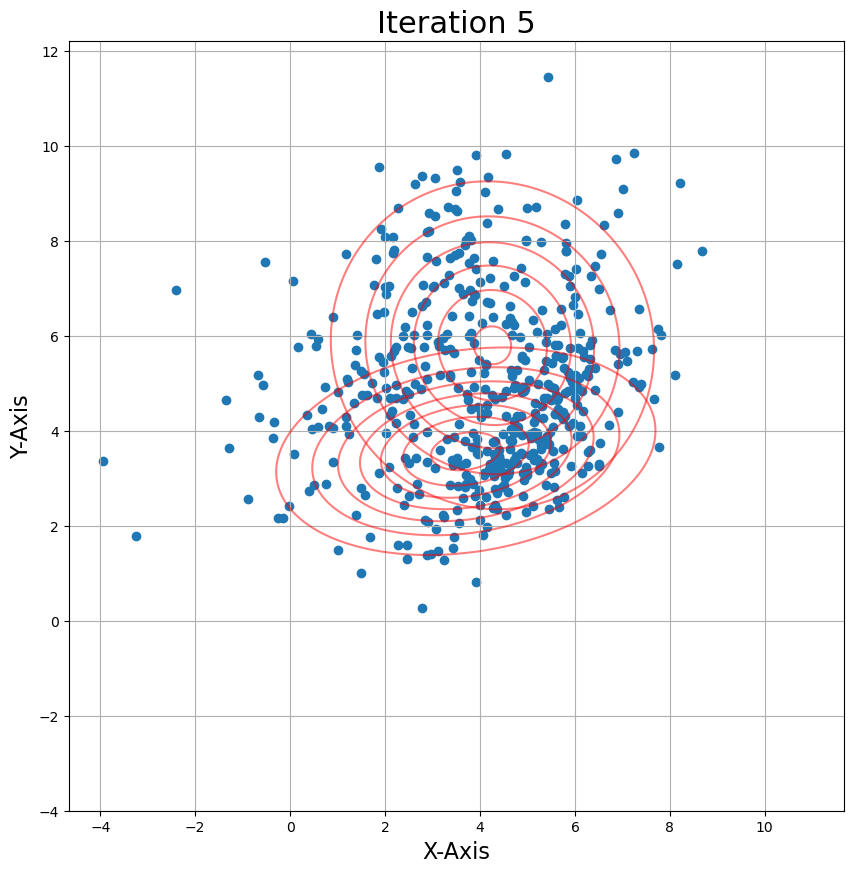

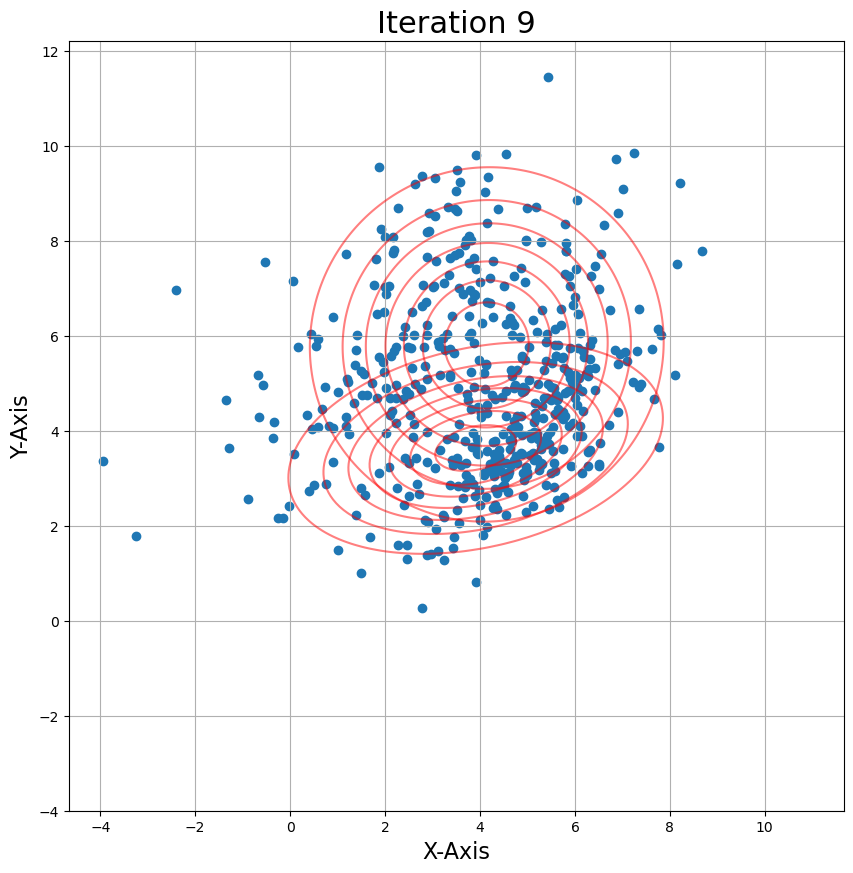

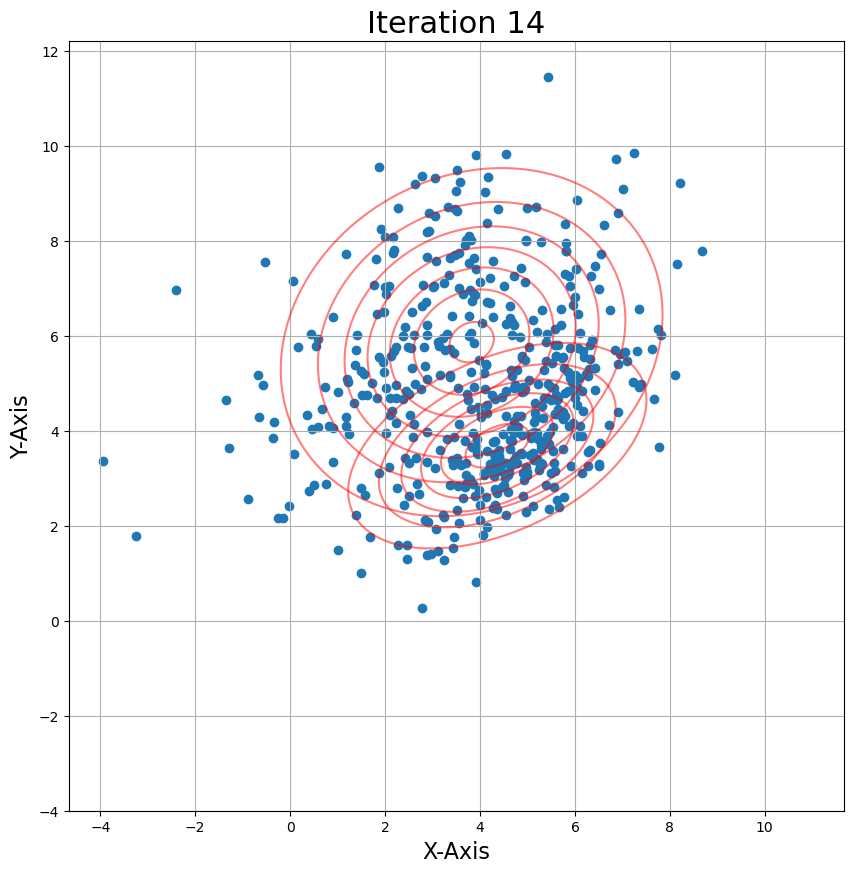

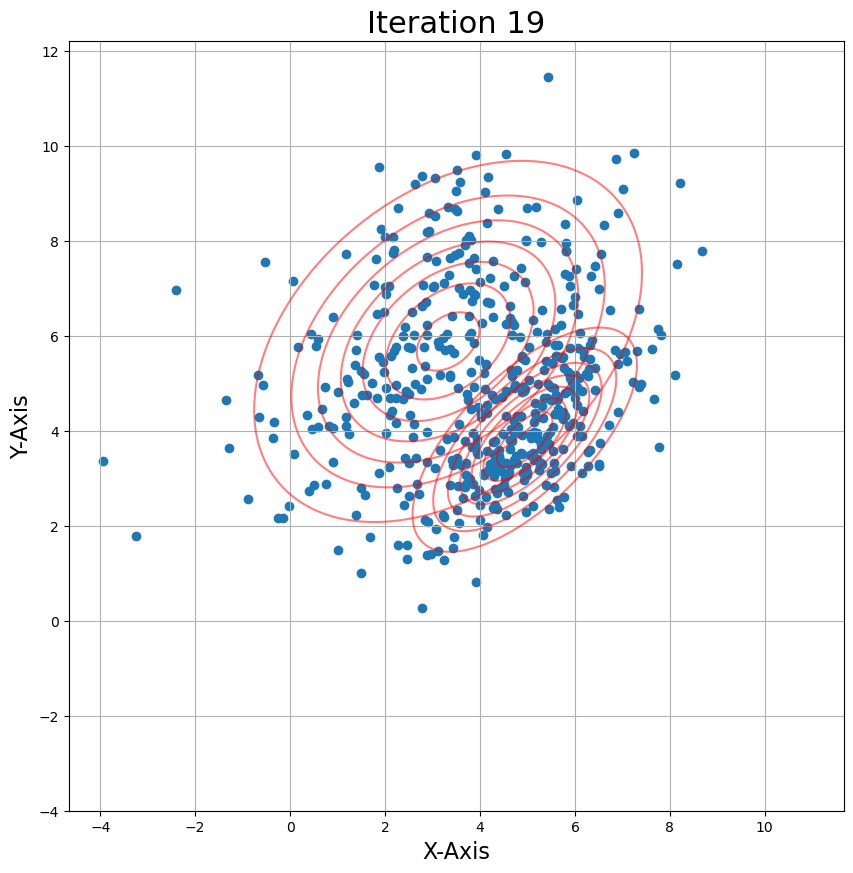

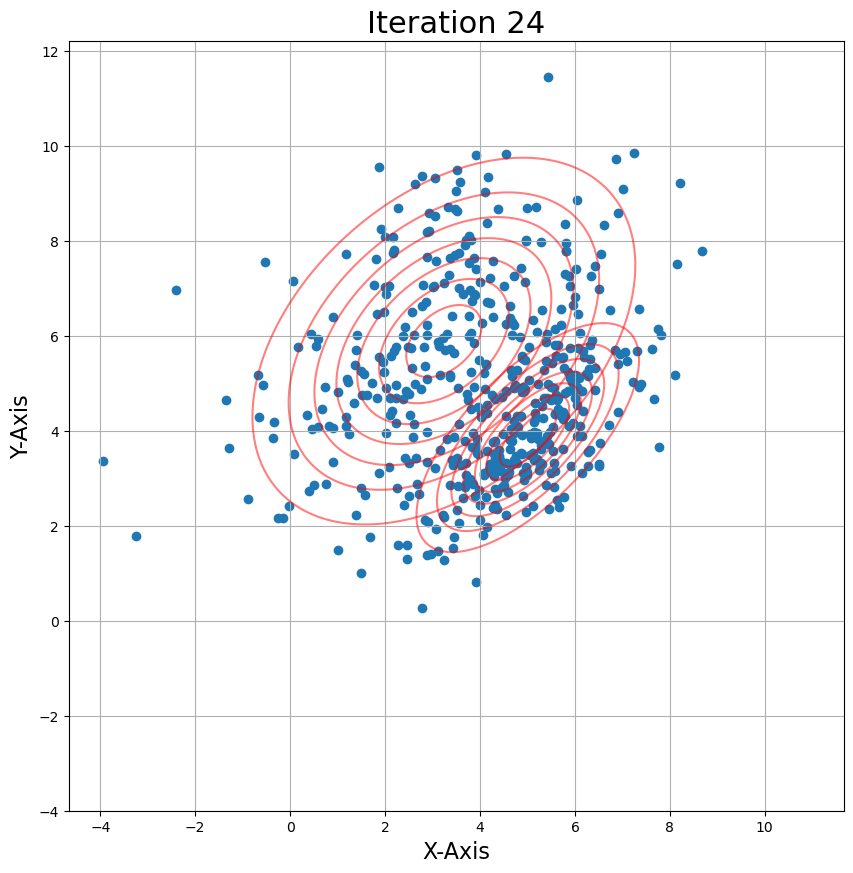

In [3]:
set_means = [[5, 4], [3, 6]]
set_cov = [[[1, 1.5], [1.5, 1]], [[2, 4], [4, 2]]]
iterations = 25
k = 2
sample_size = 250

x = np.empty(np.shape(set_means))

for i in range(len(set_means)):
    x  = np.random.multivariate_normal(set_means[i], set_cov[i], size = sample_size)
    if i == 0:
        samples = np.empty(np.shape(set_means))
    samples = np.concatenate((samples, x), axis=0)


plt.figure(figsize=(10,10))                                 
plt.scatter(samples[:,0], samples[:,1], marker='o')     
plt.axis('equal')                                  
plt.xlabel('X-Axis', fontsize=16)              
plt.ylabel('Y-Axis', fontsize=16)                     
plt.title('Samples', fontsize=22)    
plt.grid()            
plt.show()

em_alg(samples, iterations, k)

### c-1) ###
a) with less/more samples

C:\Users\meikf\AppData\Local\Temp\ipykernel_17948\1172856140.py:10: RuntimeWarning: covariance is not symmetric positive-semidefinite.
  x  = np.random.multivariate_normal(set_means[i], set_cov[i], size = sample_size)


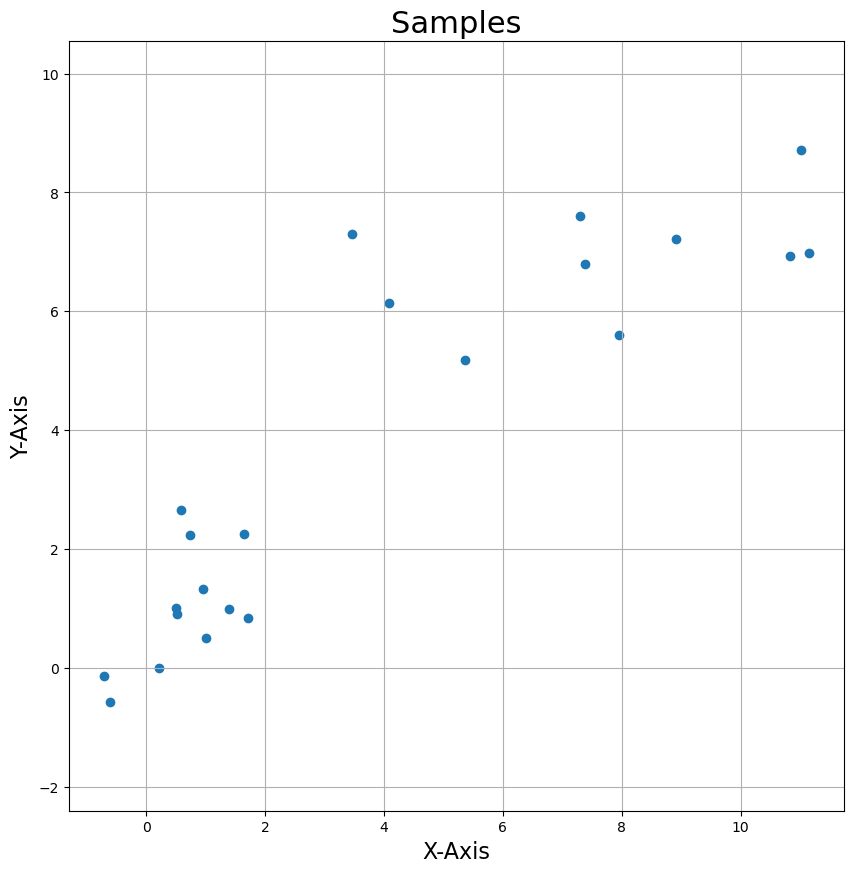

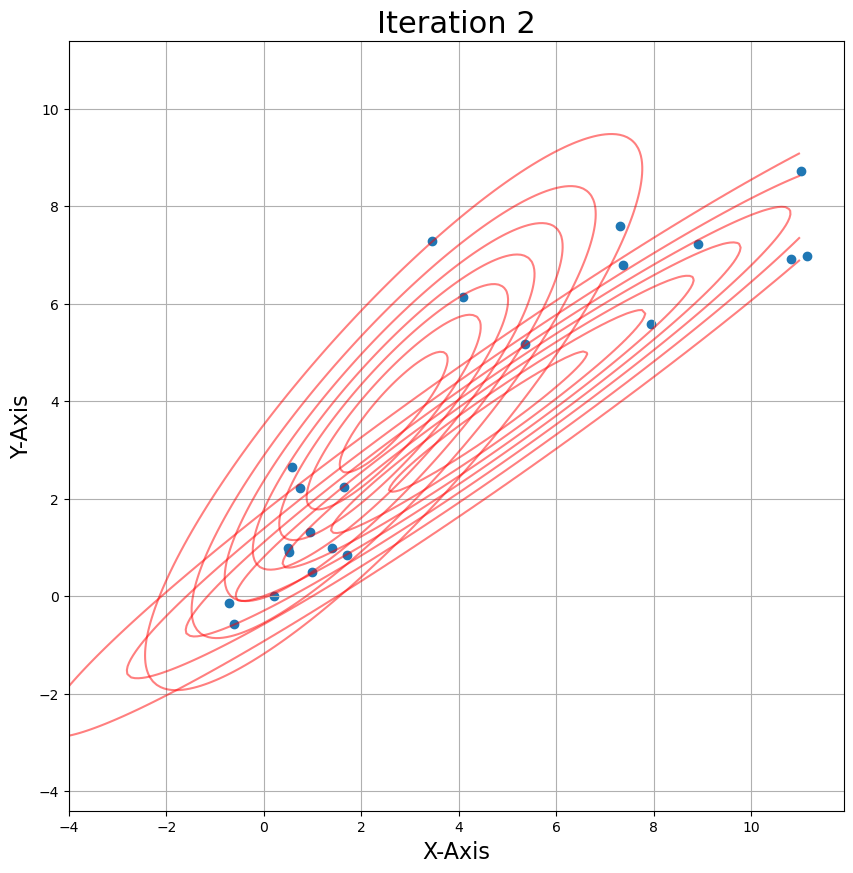

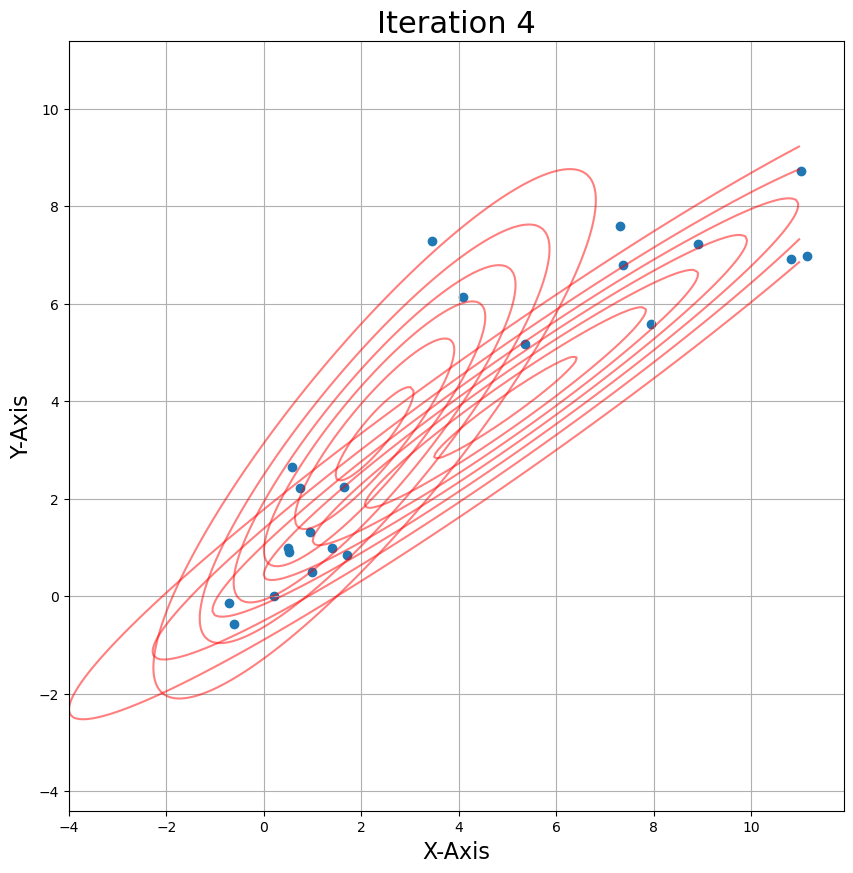

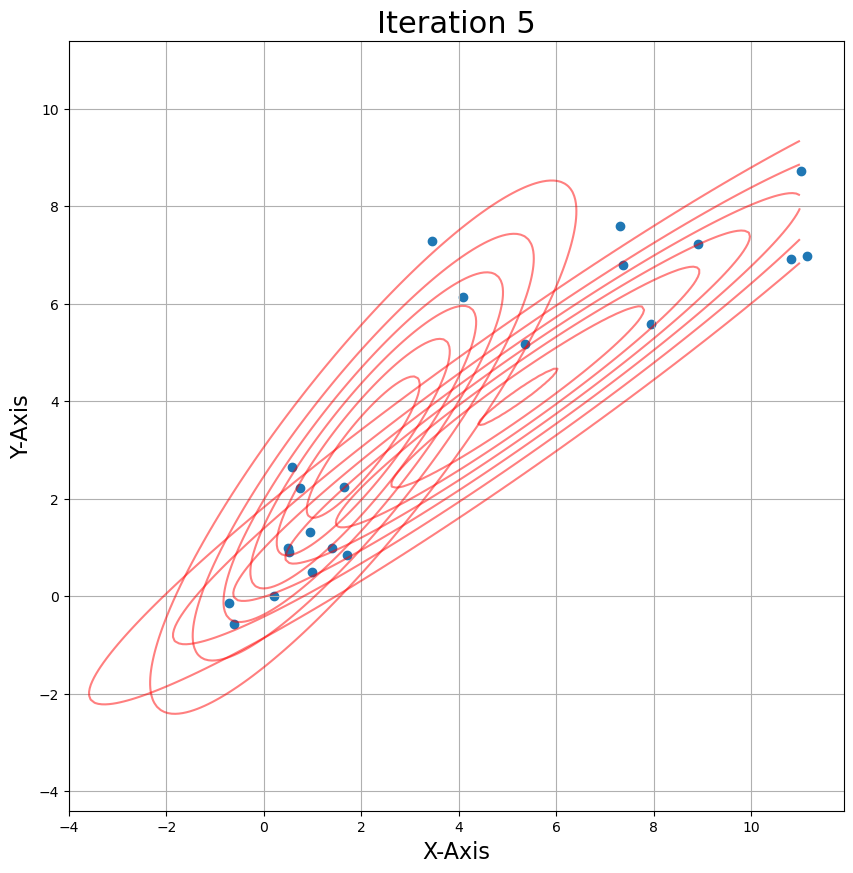

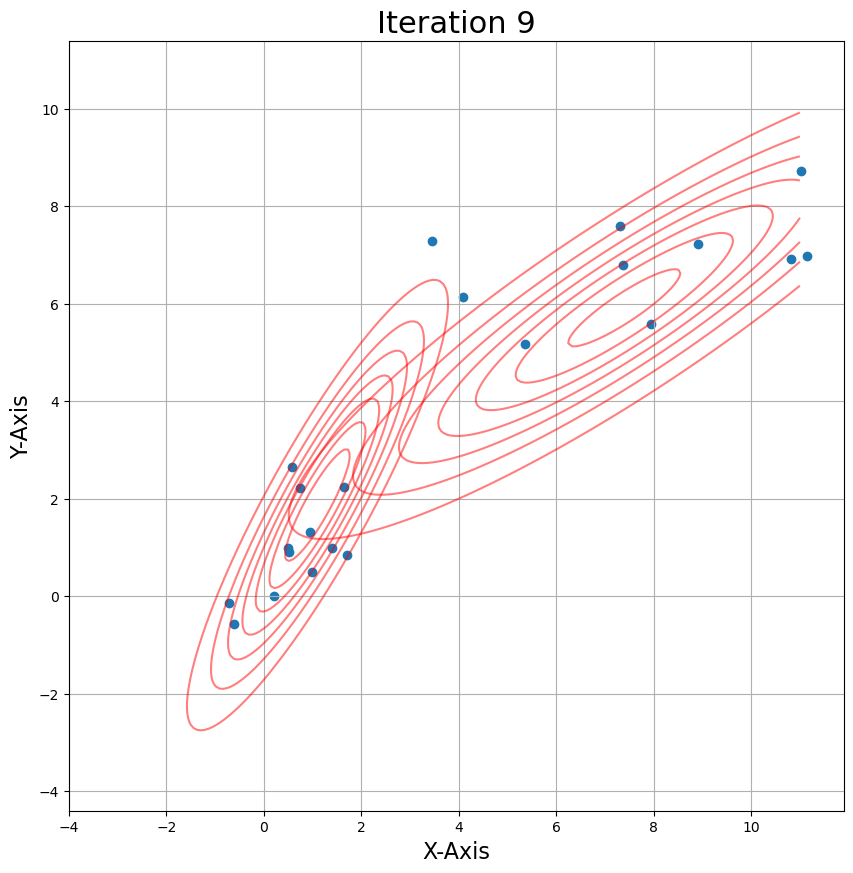

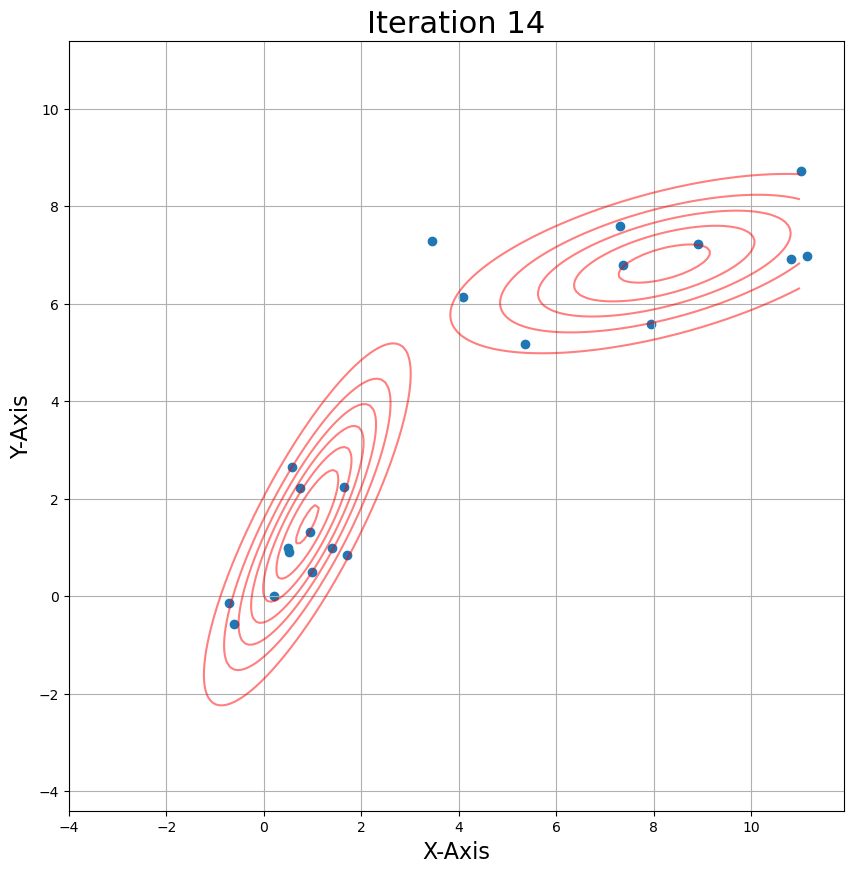

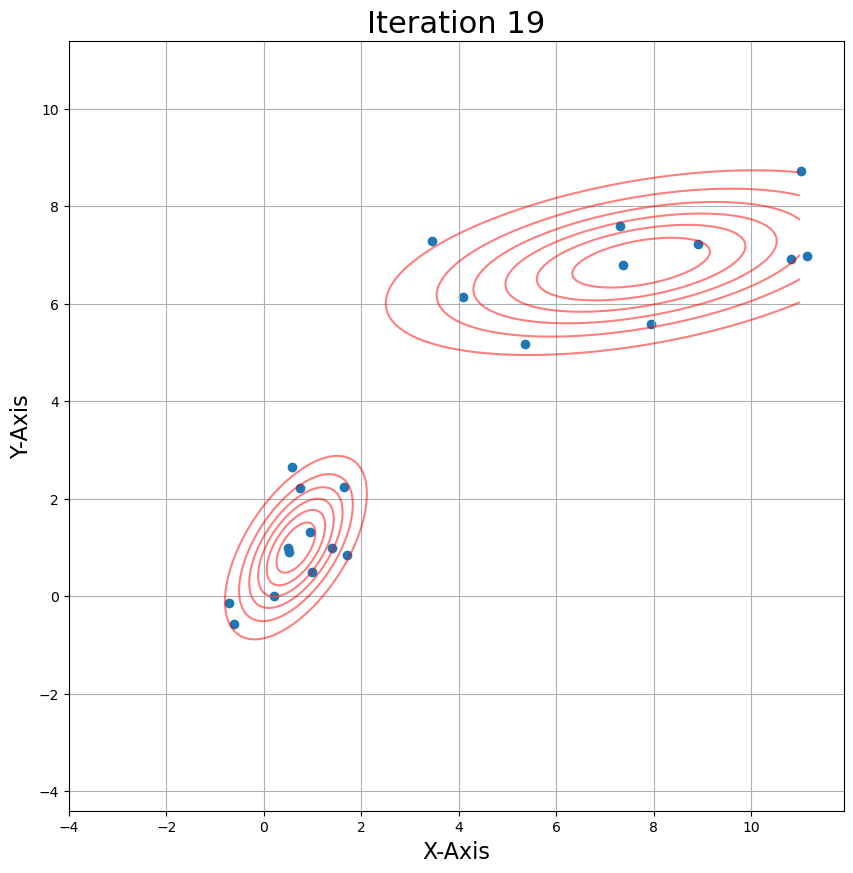

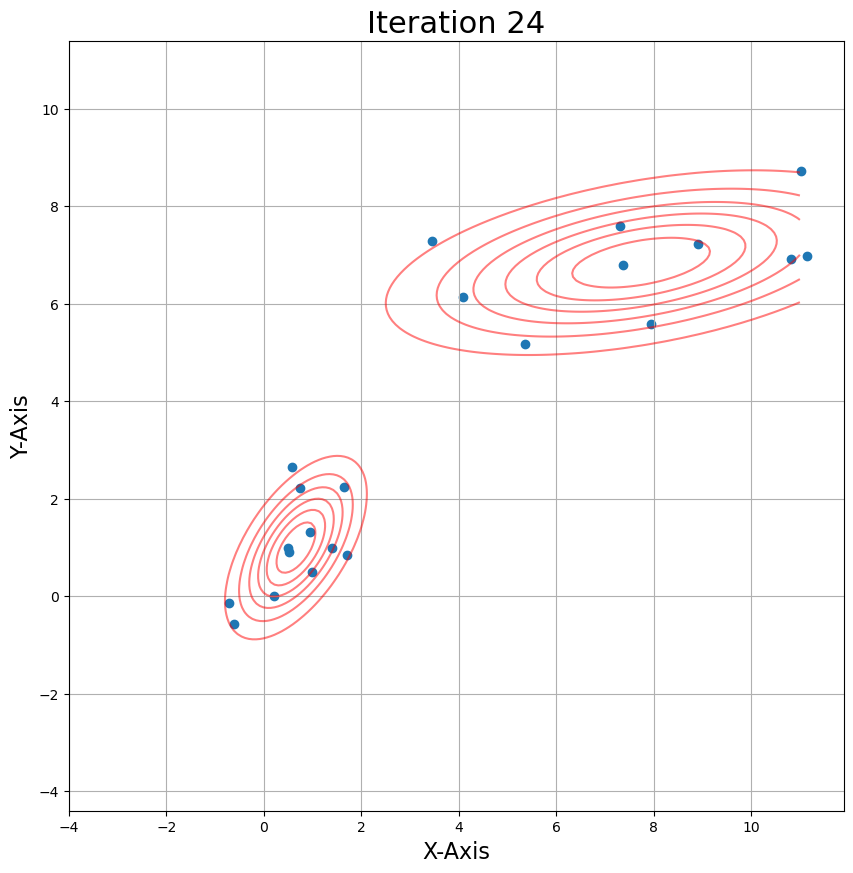

C:\Users\meikf\AppData\Local\Temp\ipykernel_17948\1172856140.py:29: RuntimeWarning: covariance is not symmetric positive-semidefinite.
  x  = np.random.multivariate_normal(set_means[i], set_cov[i], size = 1000)


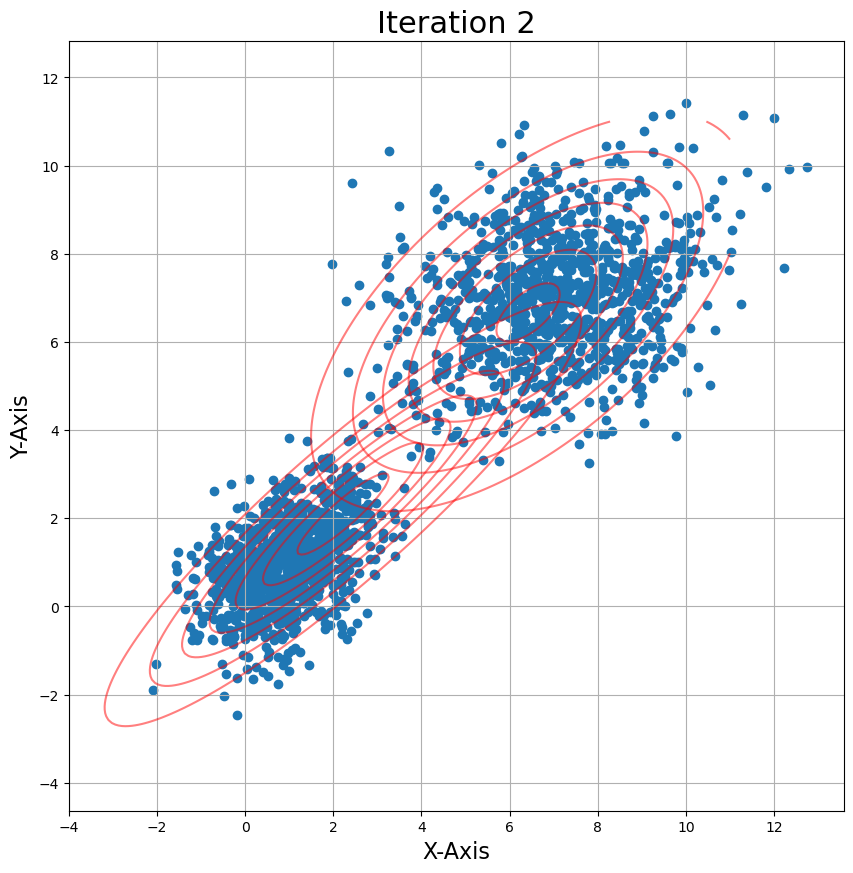

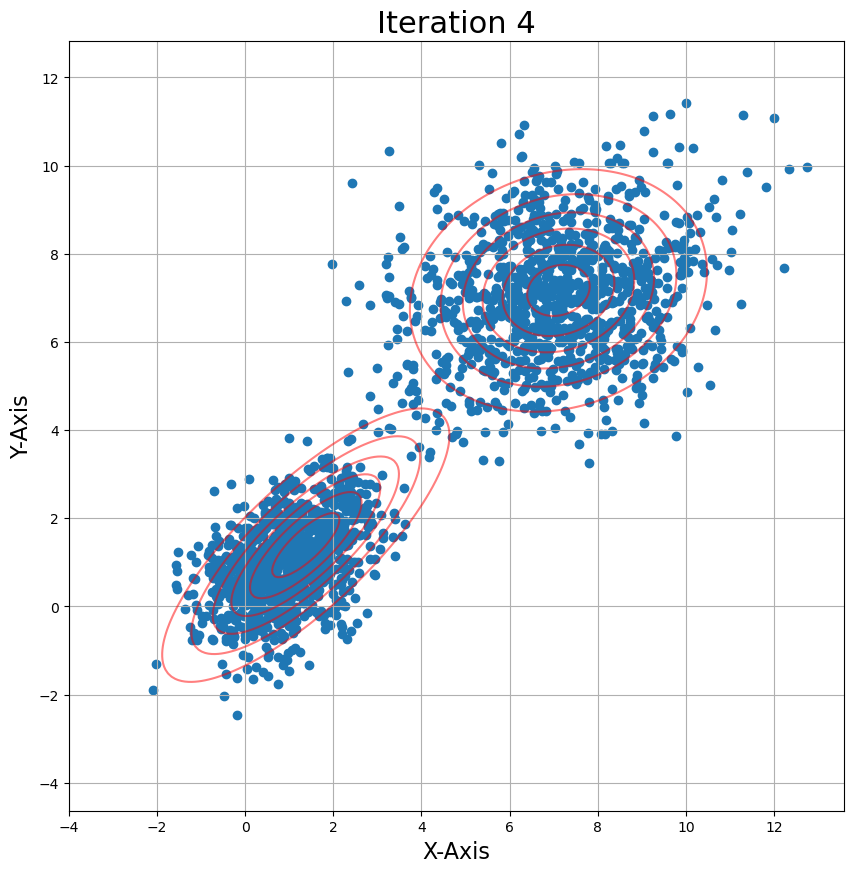

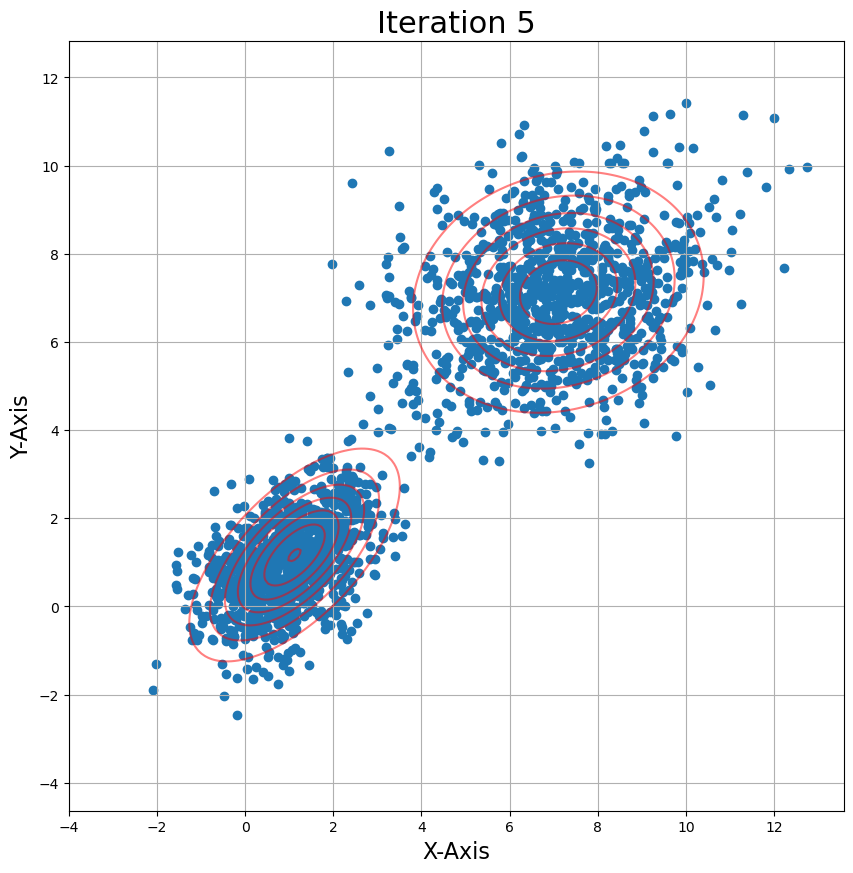

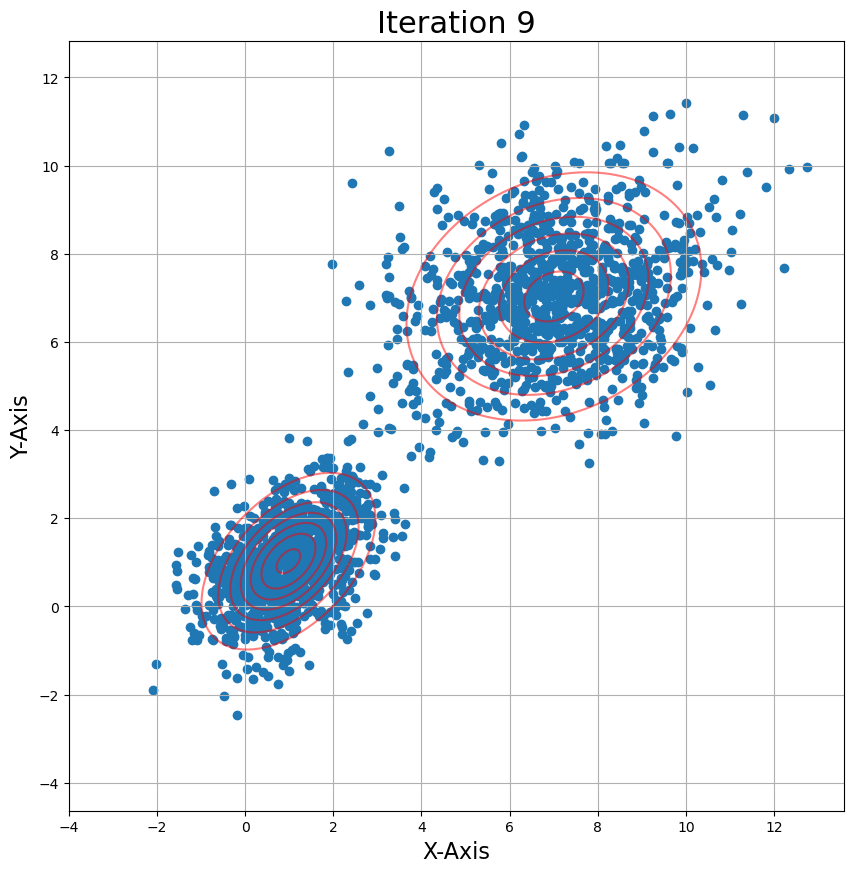

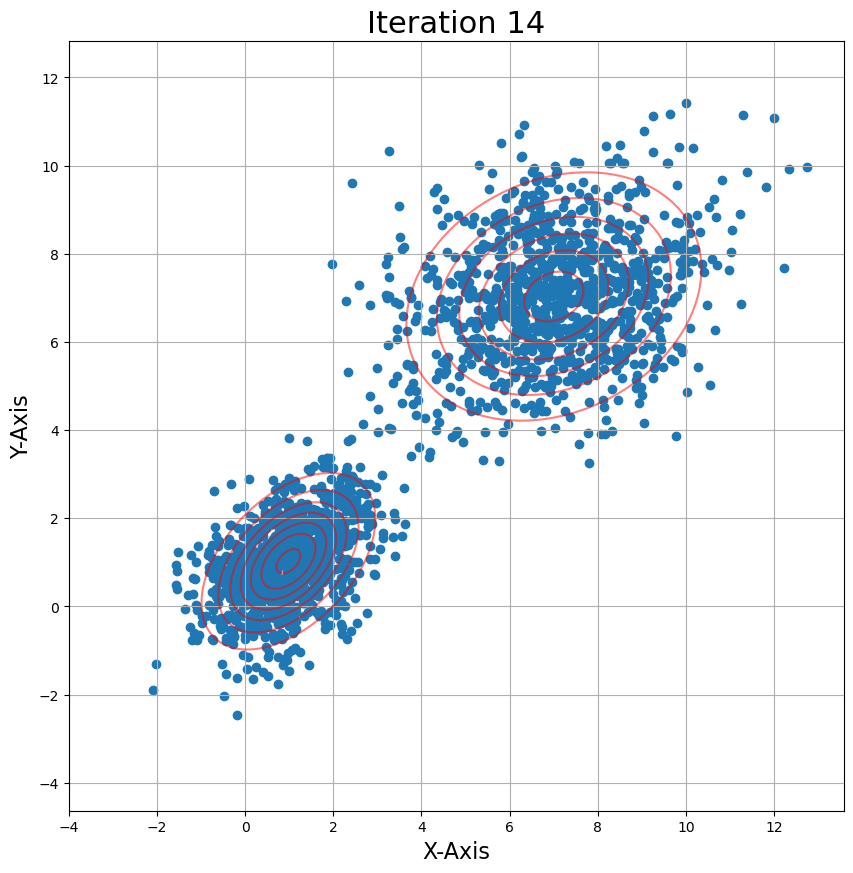

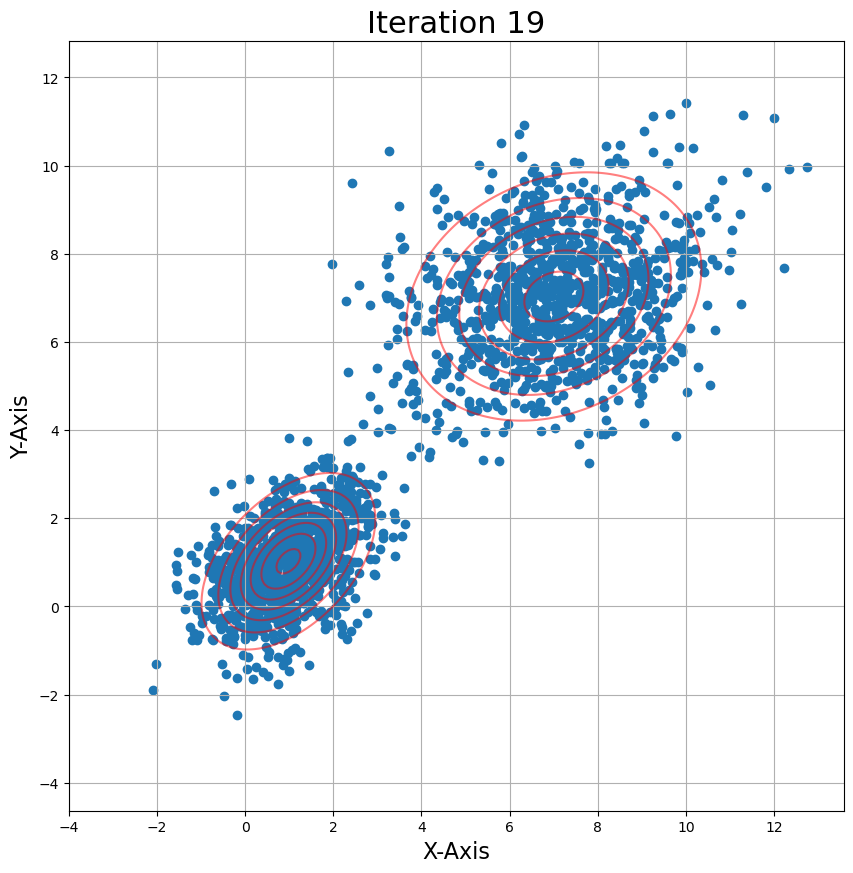

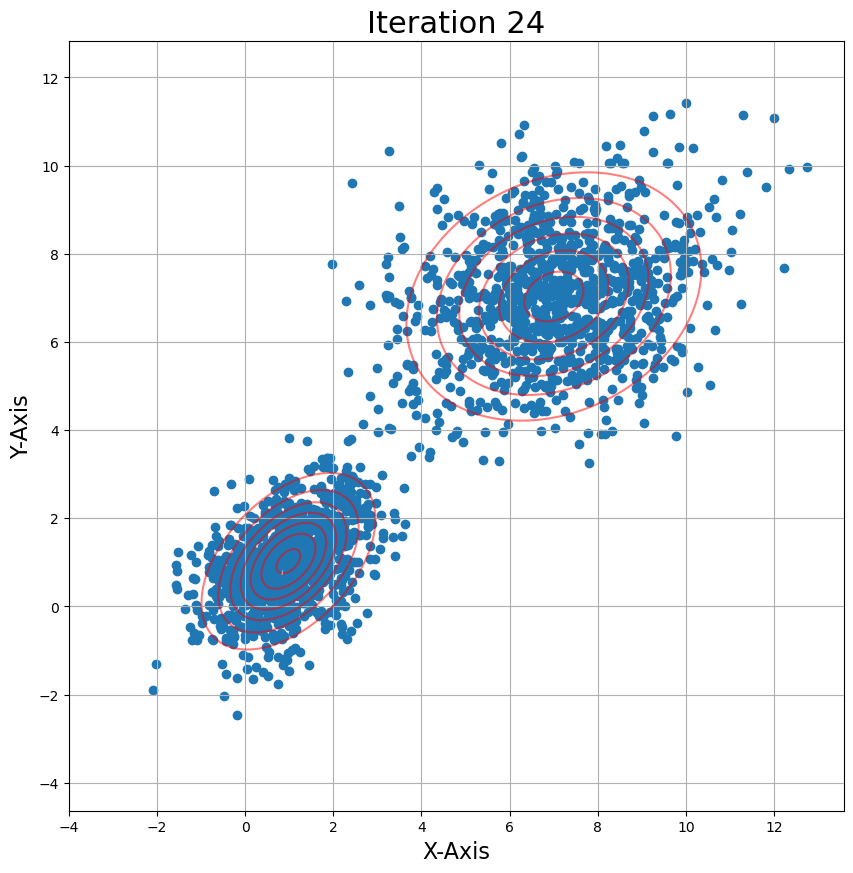

In [4]:
set_means = [[1, 1], [7, 7]]
set_cov = [[[1, 0.5], [0.5, 1]], [[2, -1], [3, 2]]]
iterations = 25
k = 2
sample_size = 10

x = np.empty(np.shape(set_means))

for i in range(len(set_means)):
    x  = np.random.multivariate_normal(set_means[i], set_cov[i], size = sample_size)
    if i == 0:
        samples = np.empty(np.shape(set_means))
    samples = np.concatenate((samples, x), axis=0)


plt.figure(figsize=(10,10))                                 
plt.scatter(samples[:,0], samples[:,1], marker='o')     
plt.axis('equal')                                  
plt.xlabel('X-Axis', fontsize=16)              
plt.ylabel('Y-Axis', fontsize=16)                     
plt.title('Samples', fontsize=22)    
plt.grid()            
plt.show()

em_alg(samples, iterations, k)


for i in range(len(set_means)):
    x  = np.random.multivariate_normal(set_means[i], set_cov[i], size = 1000)
    if i == 0:
        samples = np.empty(np.shape(set_means))
    samples = np.concatenate((samples, x), axis=0)
    
em_alg(samples, iterations, k)    #run with 1000 samples

### c-2) ###
b) with less/more samples

C:\Users\meikf\AppData\Local\Temp\ipykernel_17948\4214773969.py:10: RuntimeWarning: covariance is not symmetric positive-semidefinite.
  x  = np.random.multivariate_normal(set_means[i], set_cov[i], size = sample_size)


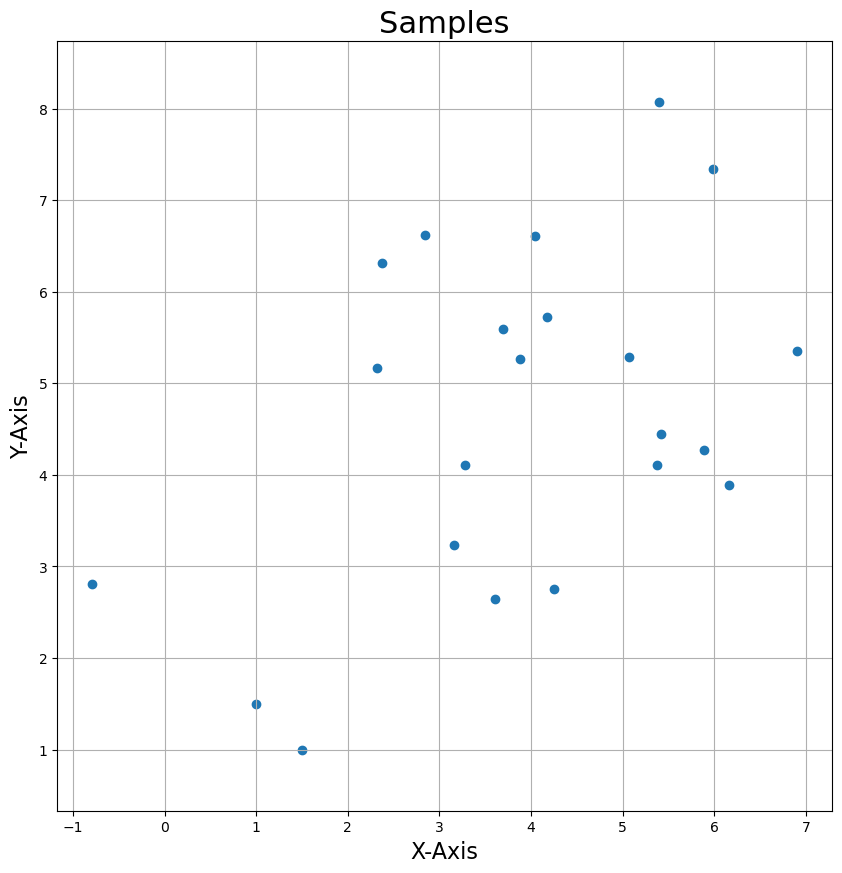

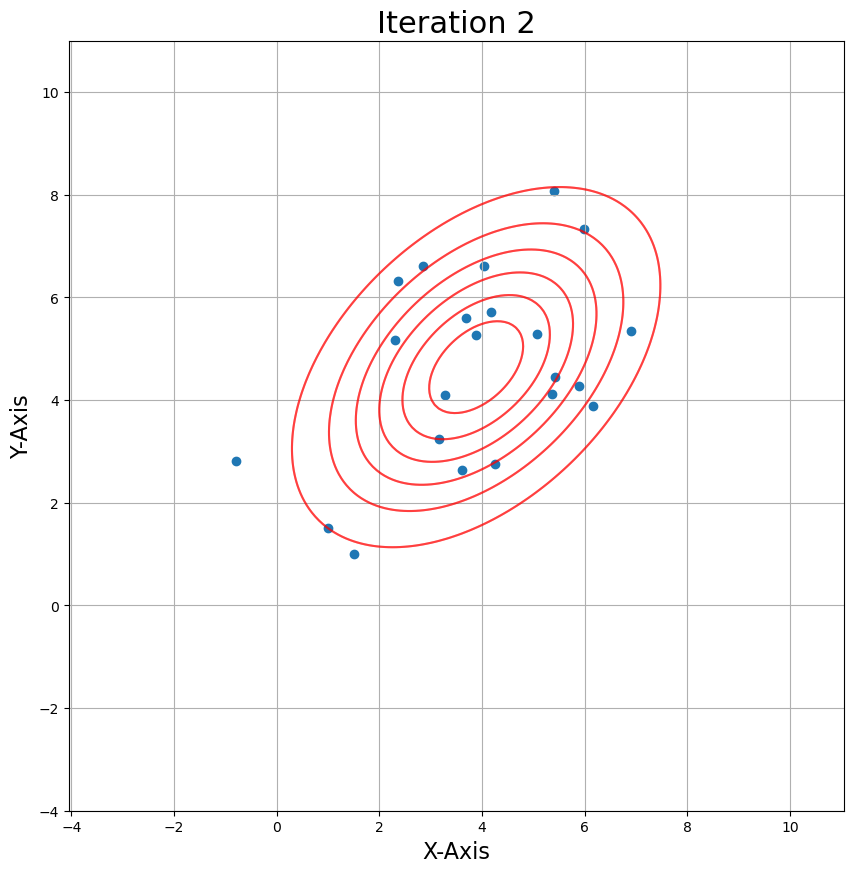

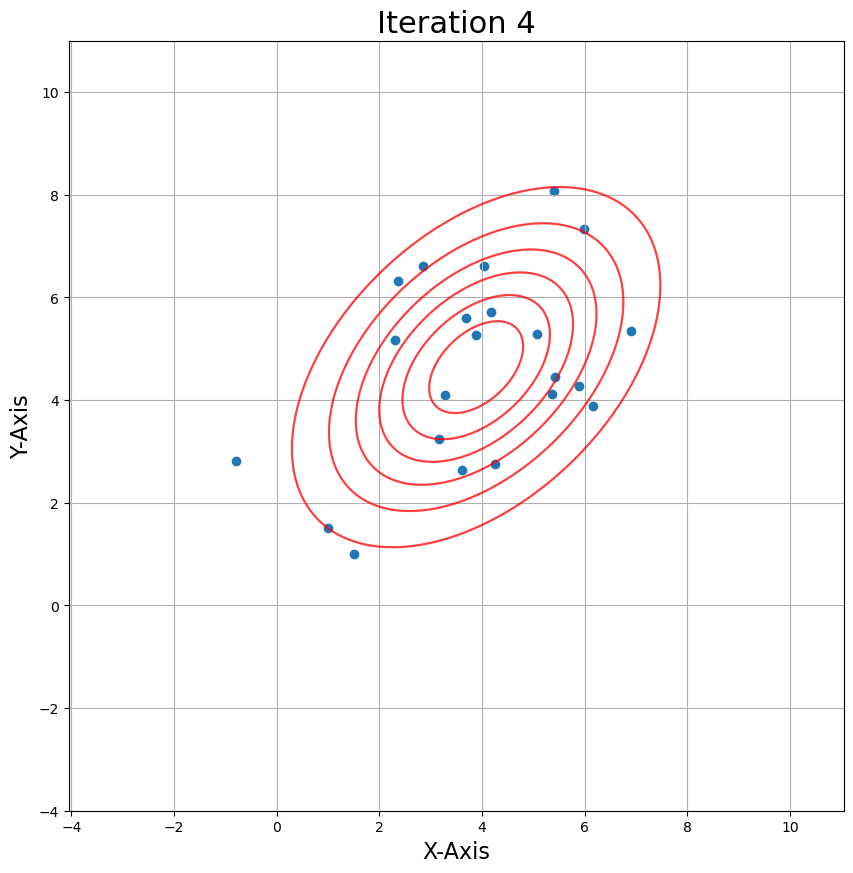

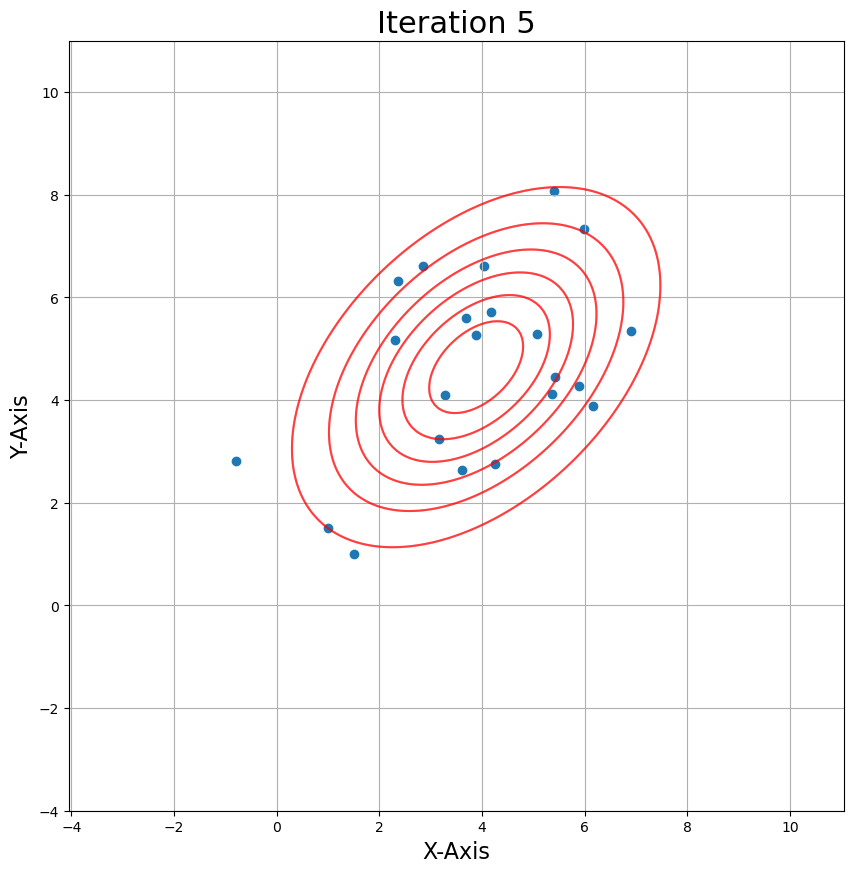

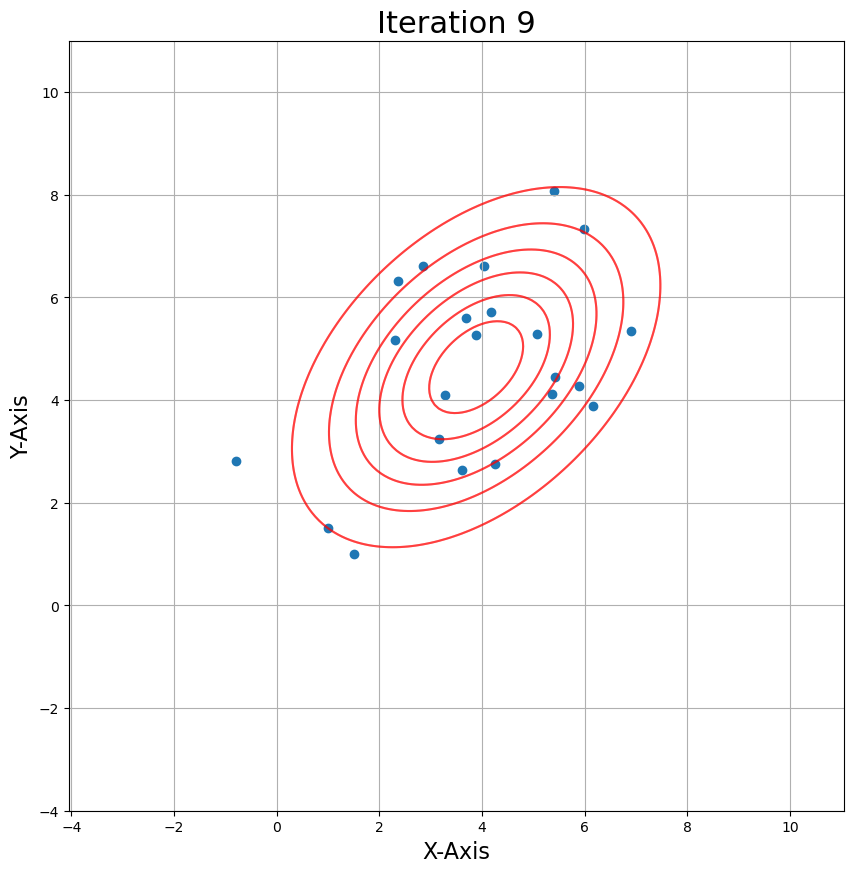

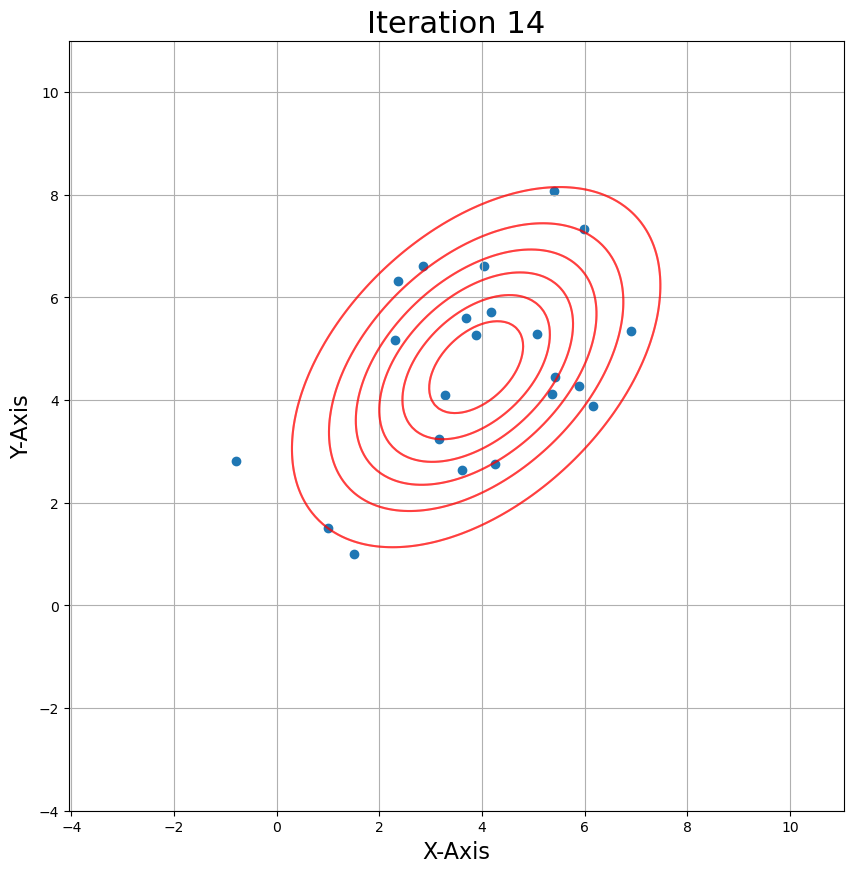

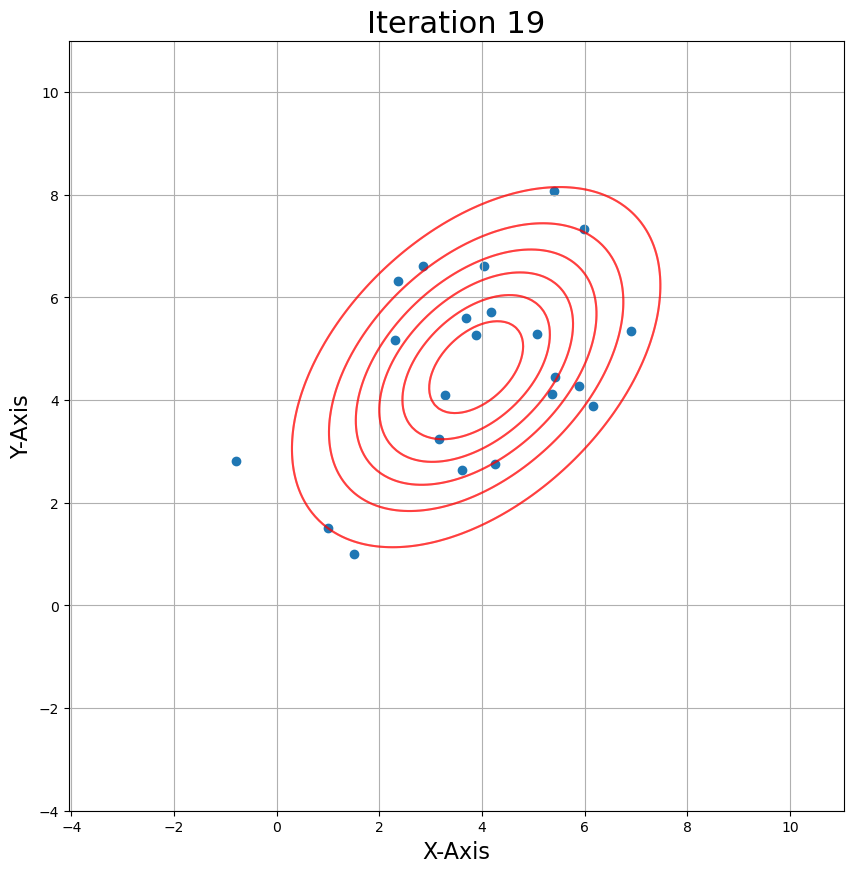

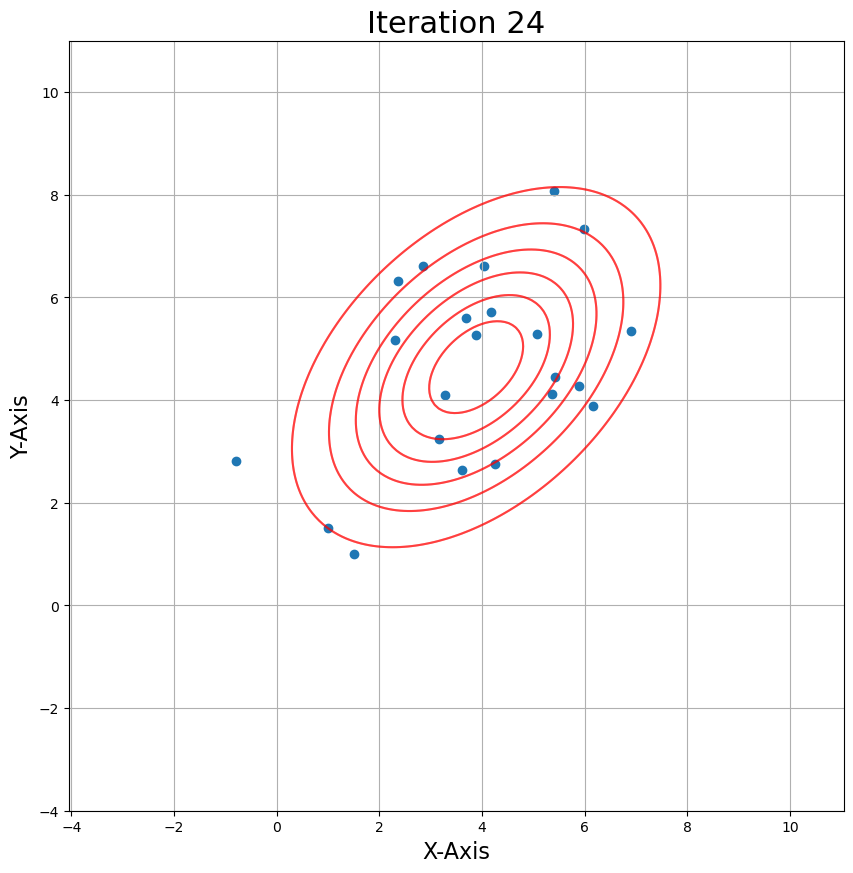

C:\Users\meikf\AppData\Local\Temp\ipykernel_17948\4214773969.py:29: RuntimeWarning: covariance is not symmetric positive-semidefinite.
  x  = np.random.multivariate_normal(set_means[i], set_cov[i], size = 1000)


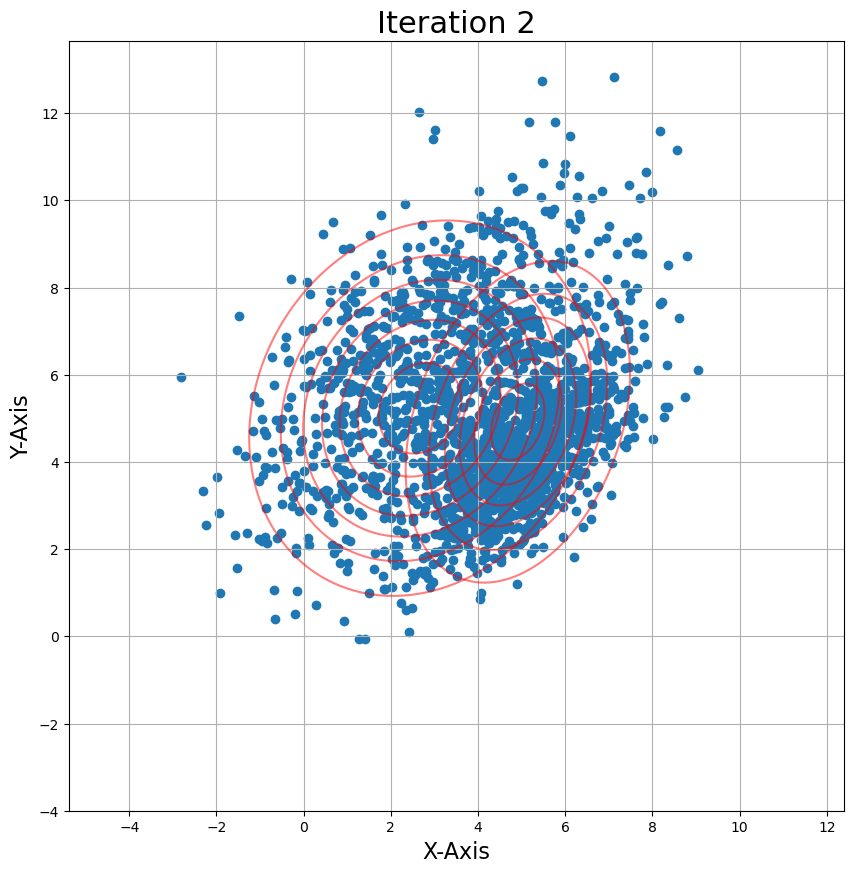

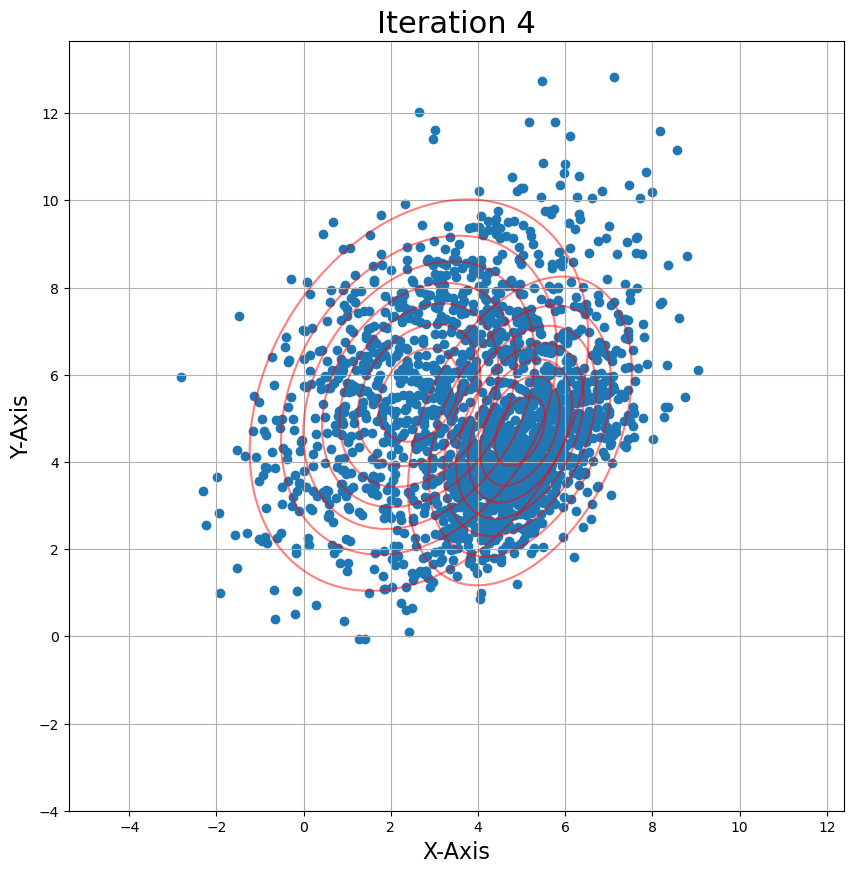

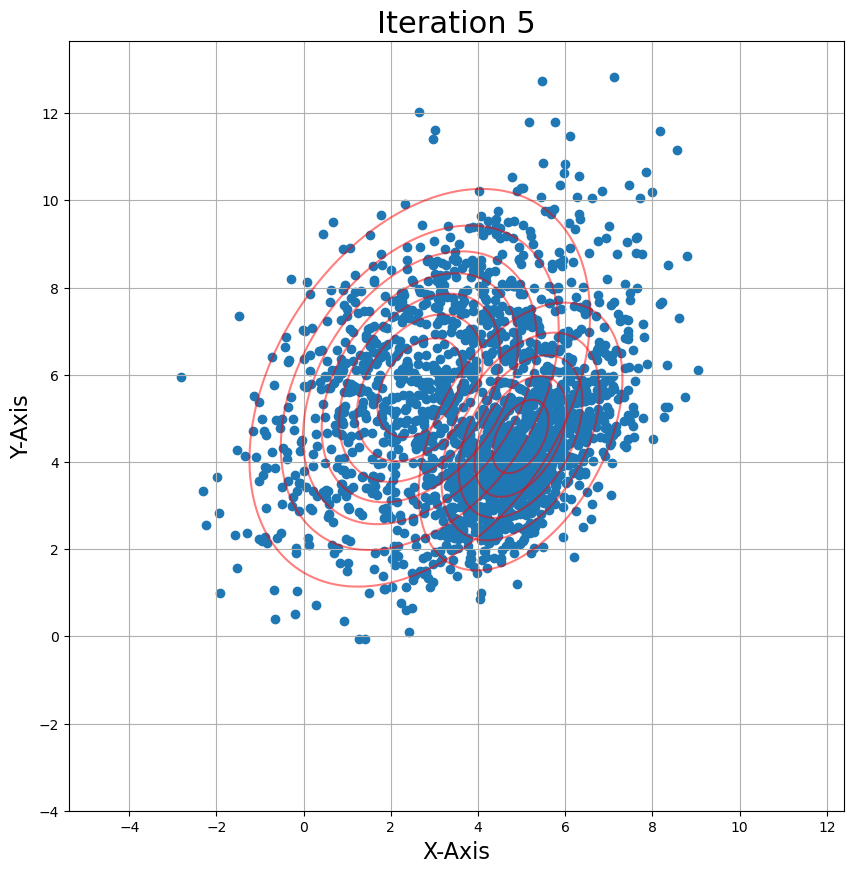

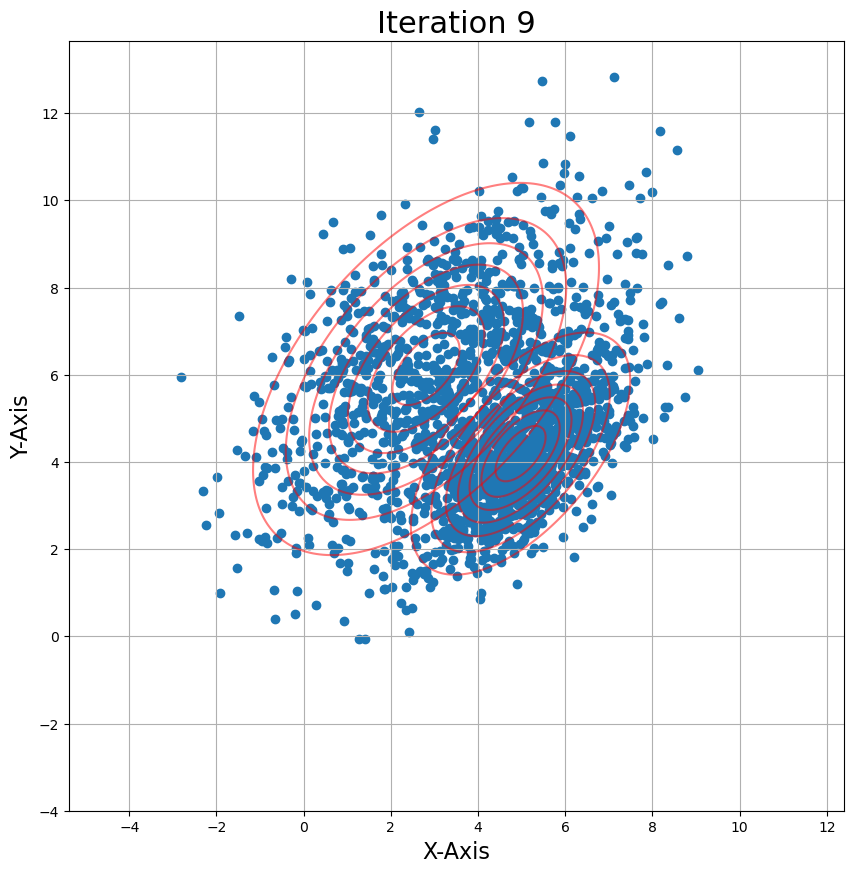

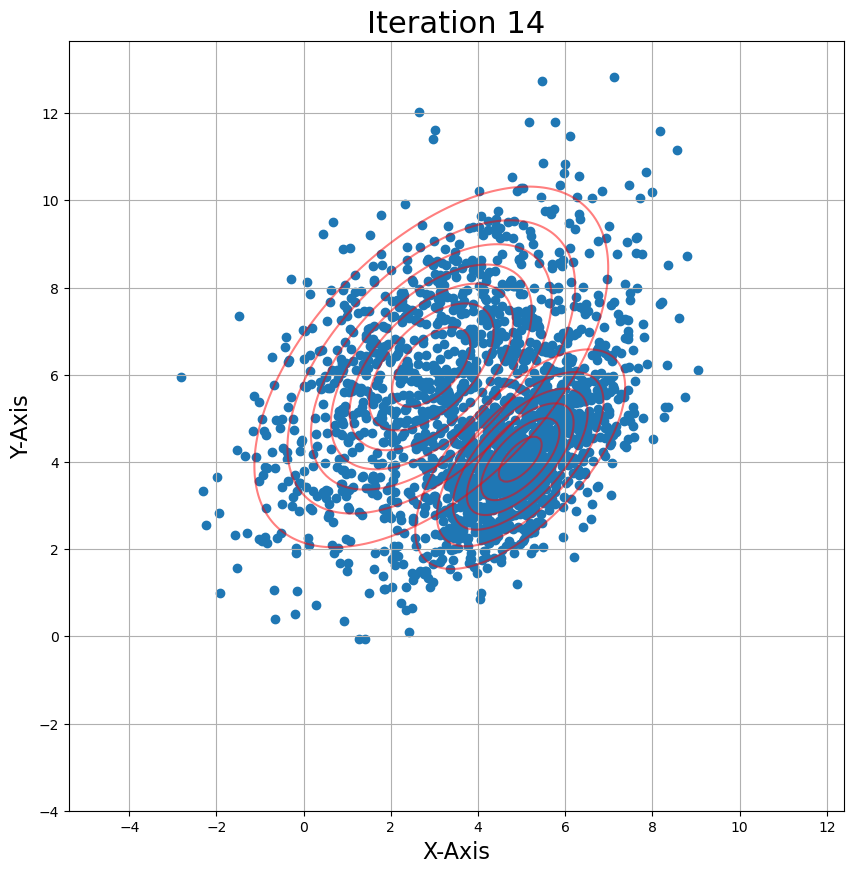

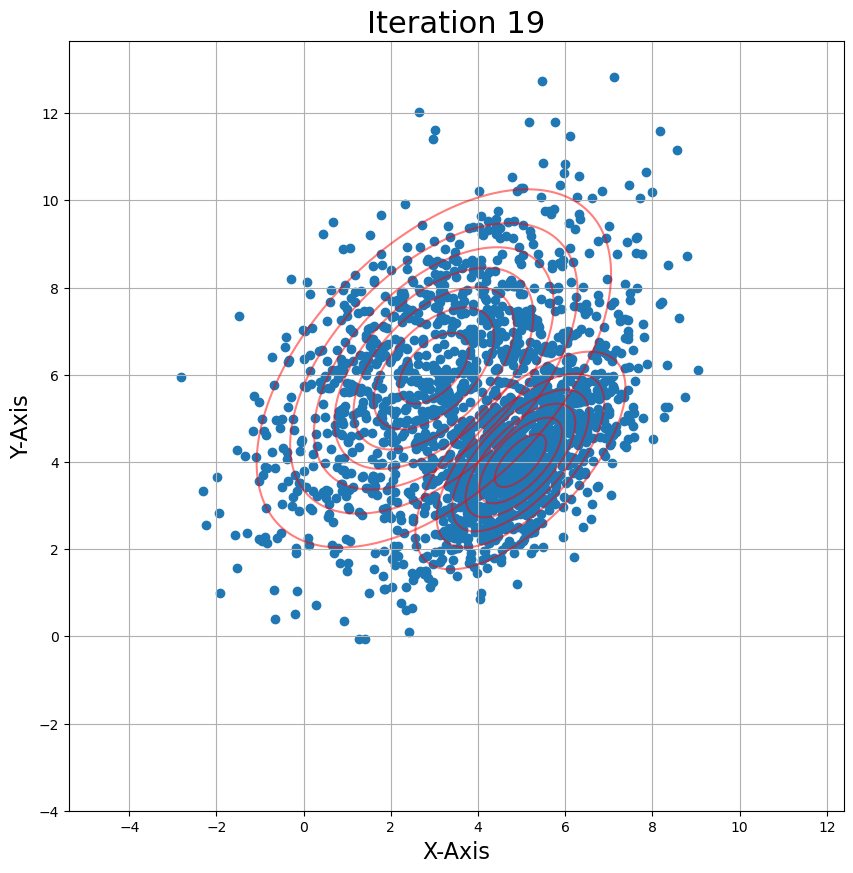

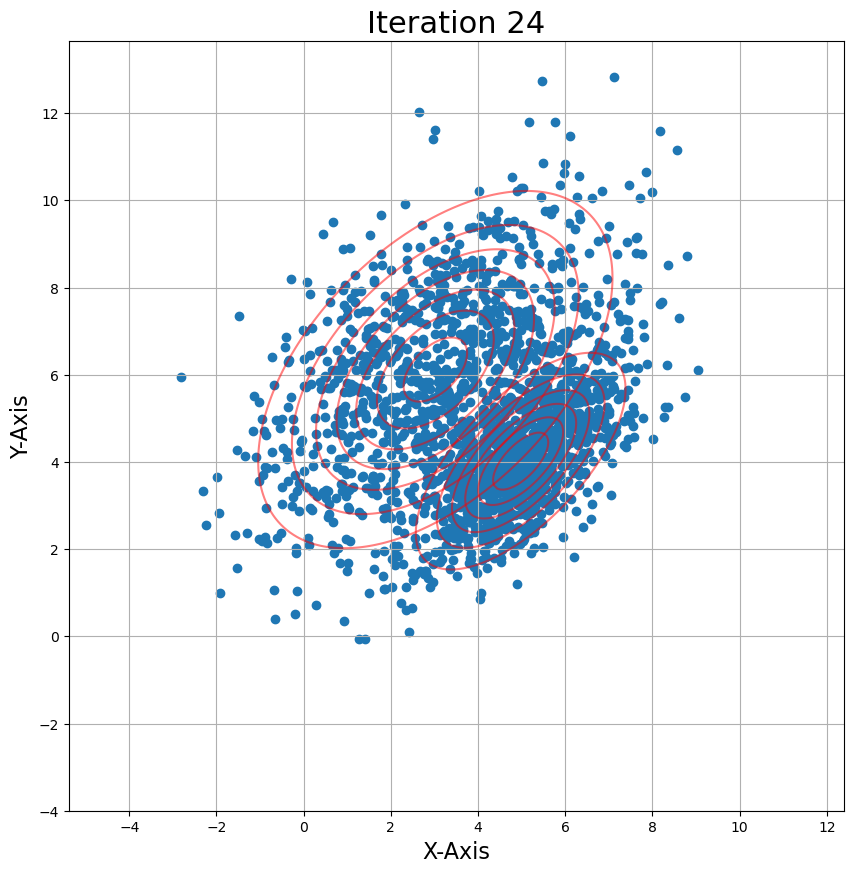

In [5]:
set_means = [[5, 4], [3, 6]]
set_cov = [[[1, 1.5], [1.5, 1]], [[2, 4], [4, 2]]]
iterations = 25
k = 2
sample_size = 10

x = np.empty(np.shape(set_means))

for i in range(len(set_means)):
    x  = np.random.multivariate_normal(set_means[i], set_cov[i], size = sample_size)
    if i == 0:
        samples = np.empty(np.shape(set_means))
    samples = np.concatenate((samples, x), axis=0)


plt.figure(figsize=(10,10))                                 
plt.scatter(samples[:,0], samples[:,1], marker='o')     
plt.axis('equal')                                  
plt.xlabel('X-Axis', fontsize=16)              
plt.ylabel('Y-Axis', fontsize=16)                     
plt.title('Samples', fontsize=22)    
plt.grid()            
plt.show()

em_alg(samples, iterations, k)


for i in range(len(set_means)):
    x  = np.random.multivariate_normal(set_means[i], set_cov[i], size = 1000)
    if i == 0:
        samples = np.empty(np.shape(set_means))
    samples = np.concatenate((samples, x), axis=0)
    
em_alg(samples, iterations, k)    #run with 1000 samples

### d) ###

C:\Users\meikf\AppData\Local\Temp\ipykernel_17948\2556137134.py:10: RuntimeWarning: covariance is not symmetric positive-semidefinite.
  x  = np.random.multivariate_normal(set_means[i], set_cov[i], size = sample_size)


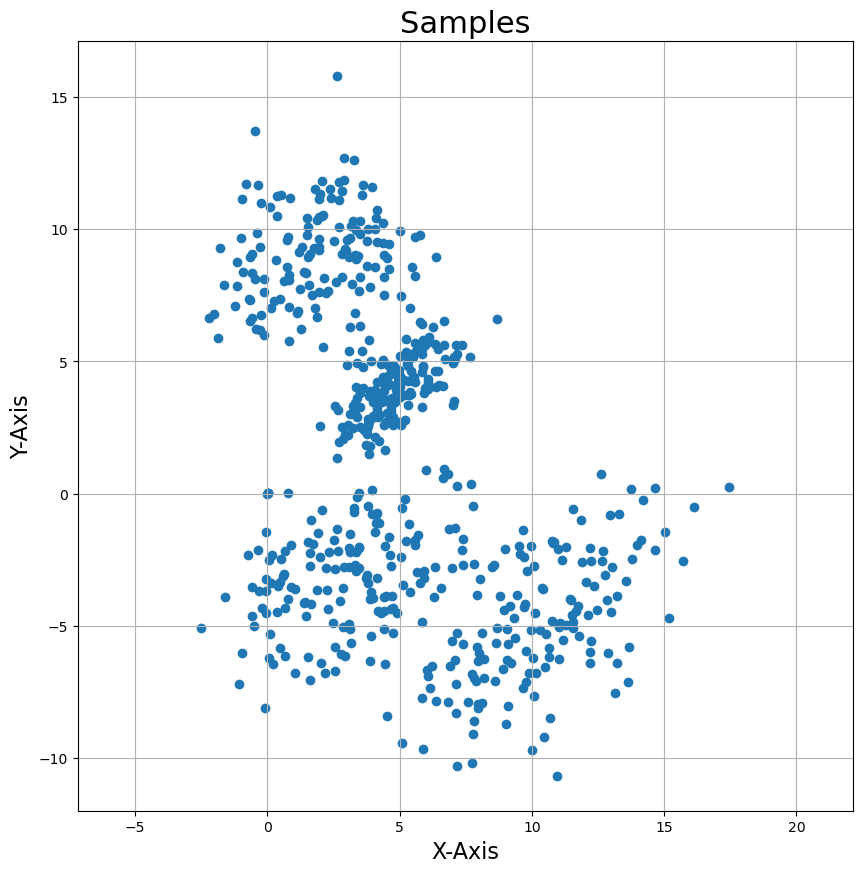

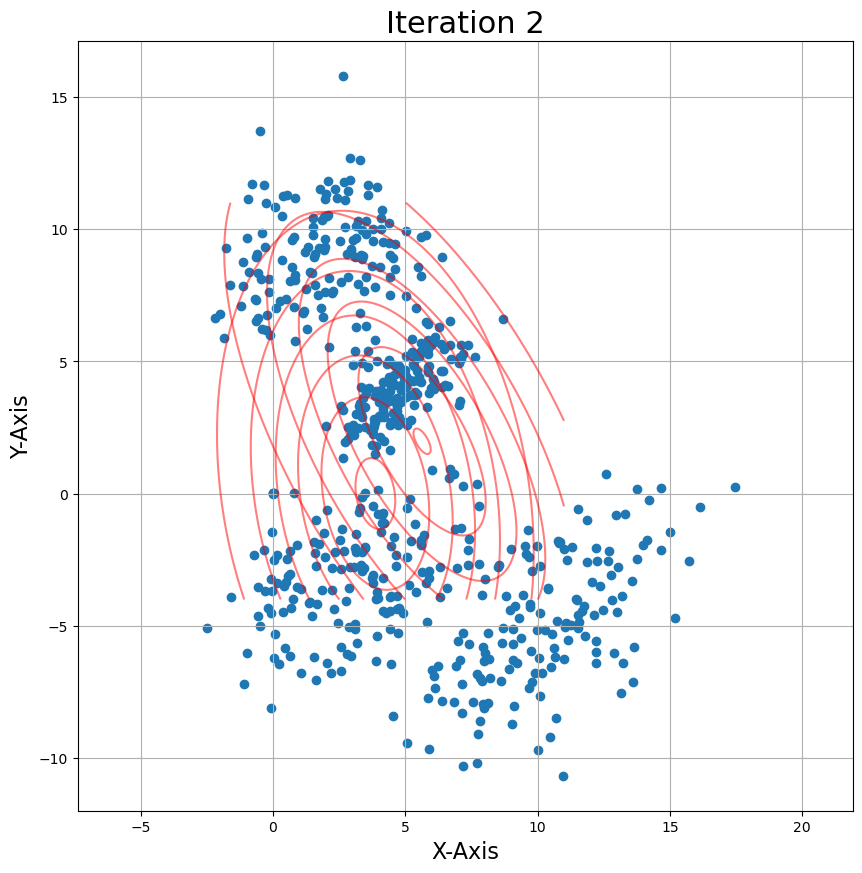

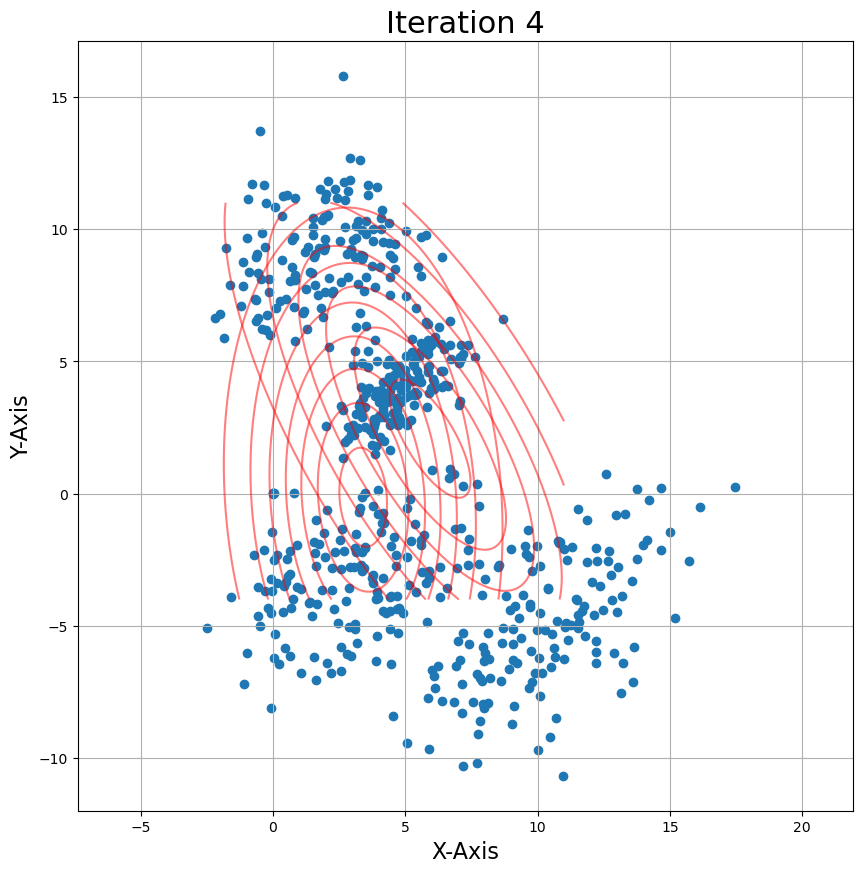

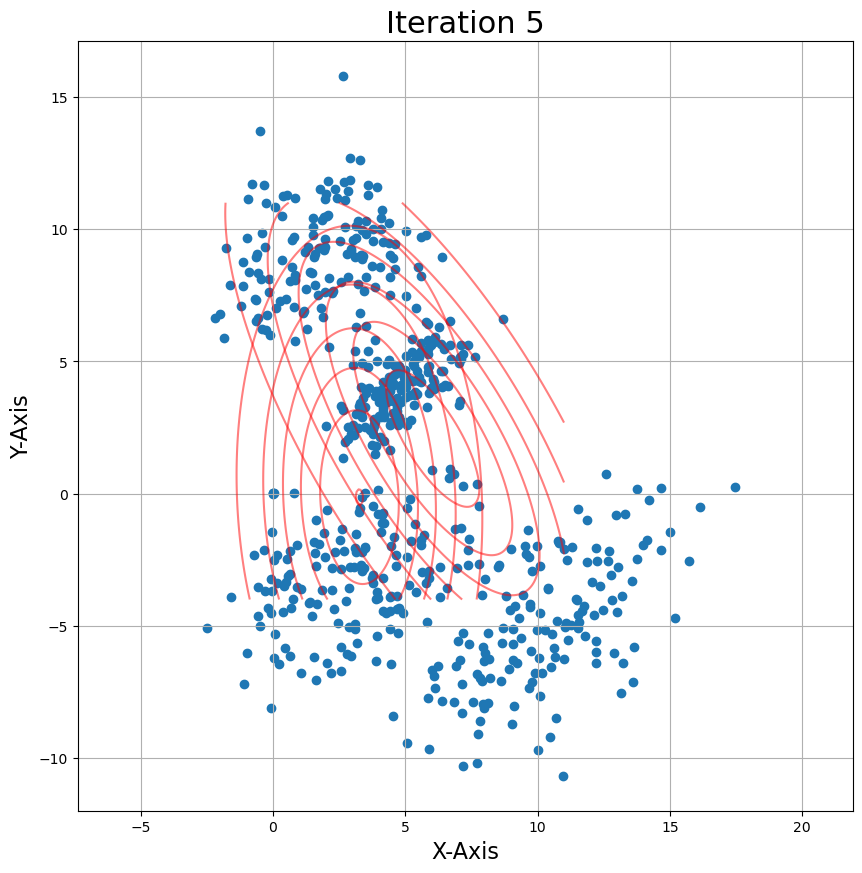

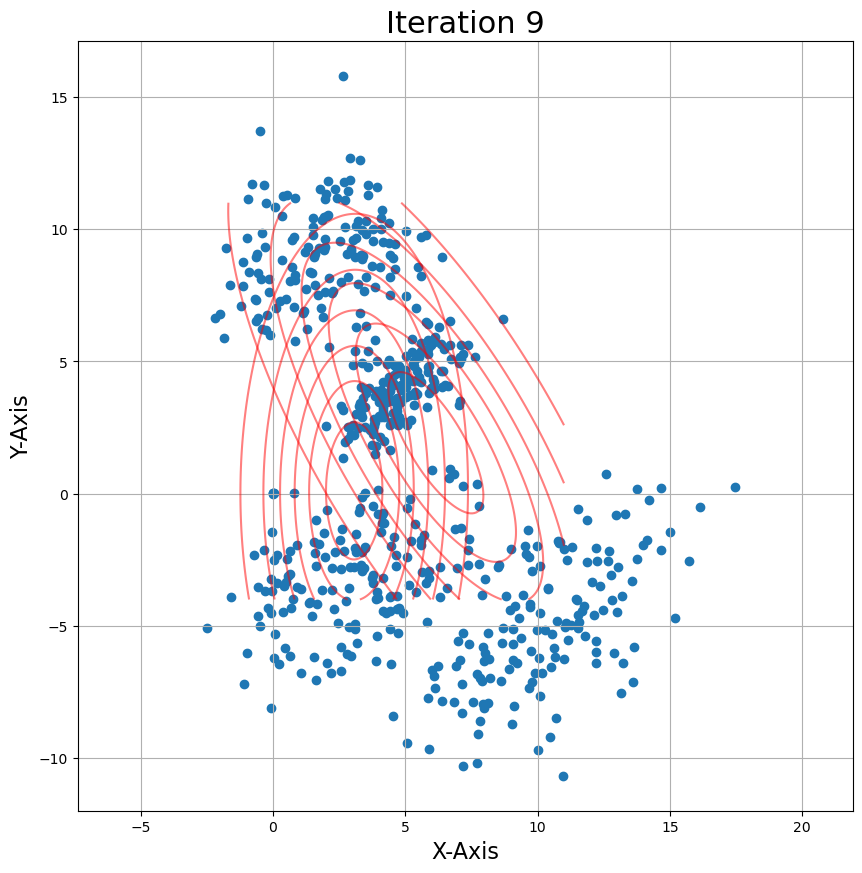

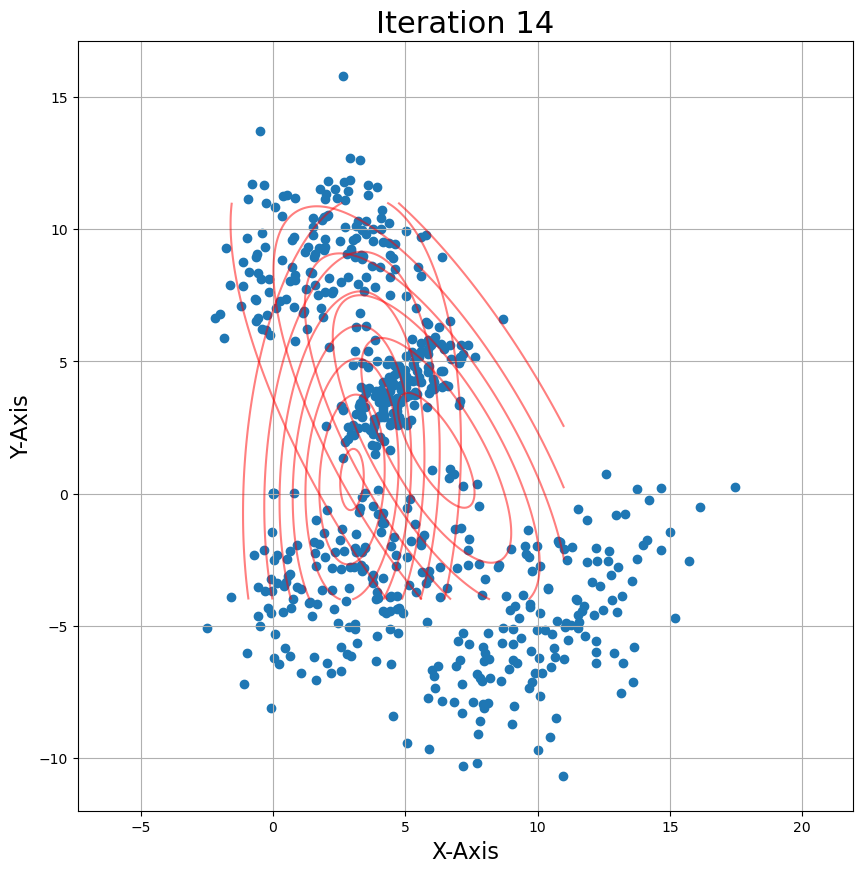

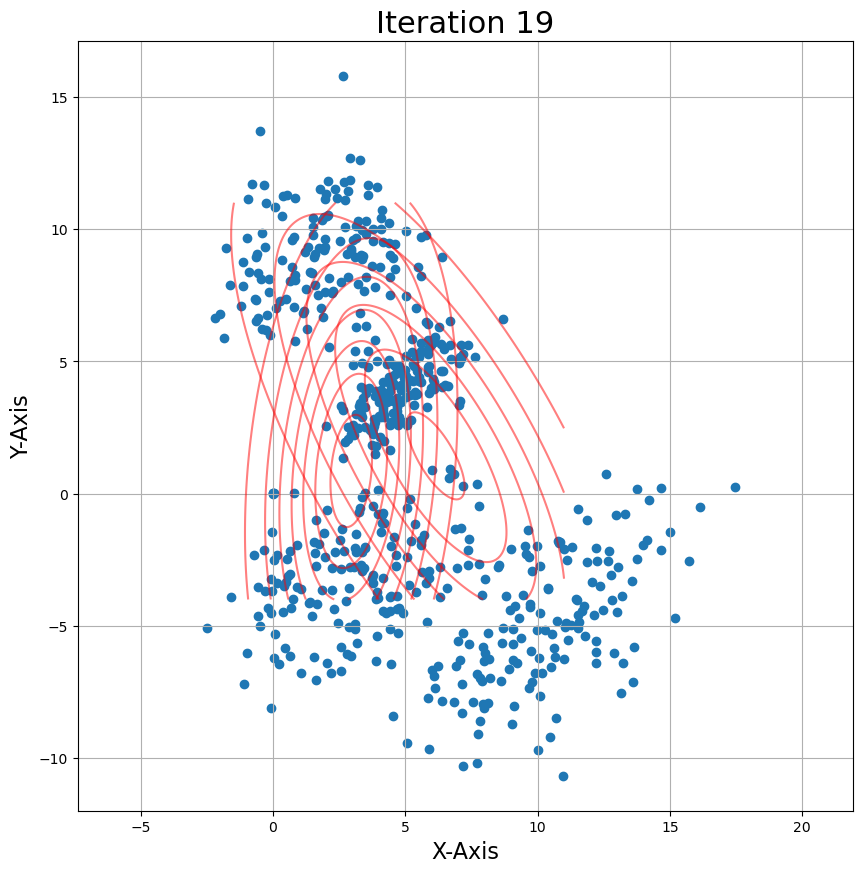

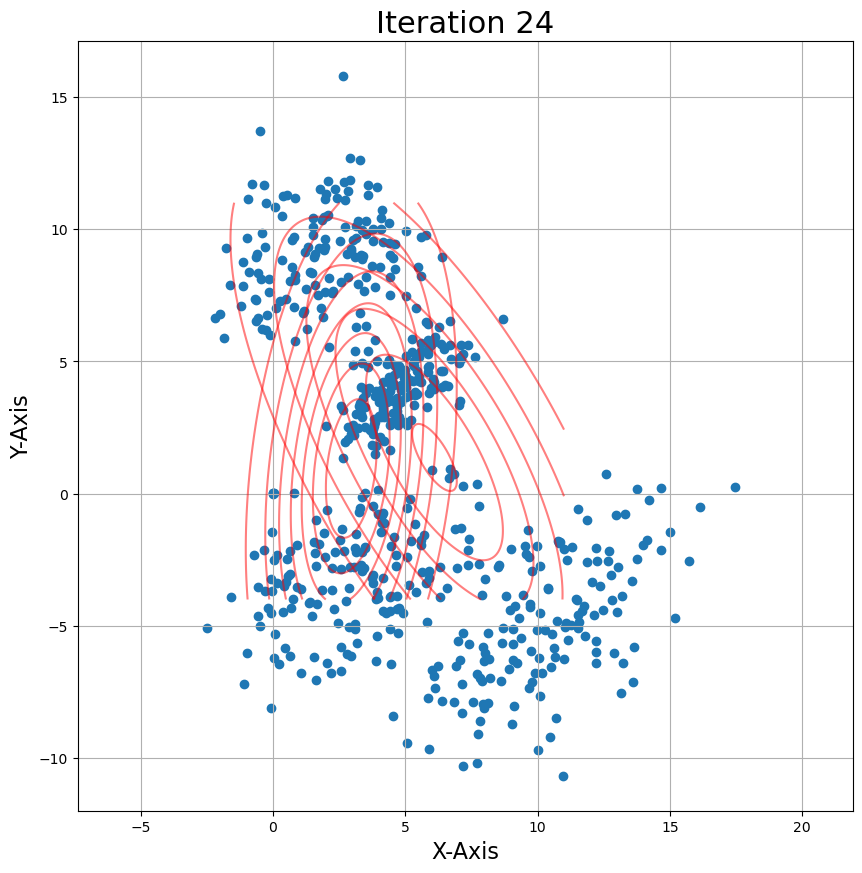

In [8]:
set_means = [[5, 4], [3, -3], [2, 9], [10, -5]]
set_cov = [[[1, 1.5], [1.5, 1]], [[2, 4], [4, 2]], [[1, 4], [4, 1]], [[7, 4], [4, 7]]]
iterations = 25
k = 2
sample_size = 150

x = np.empty(np.shape(set_means))

for i in range(len(set_means)):
    x  = np.random.multivariate_normal(set_means[i], set_cov[i], size = sample_size)
    if i == 0:
        samples = np.empty(np.shape(set_means))
    samples = np.concatenate((samples, x), axis=0)


plt.figure(figsize=(10,10))                                 
plt.scatter(samples[:,0], samples[:,1], marker='o')     
plt.axis('equal')                                  
plt.xlabel('X-Axis', fontsize=16)              
plt.ylabel('Y-Axis', fontsize=16)                     
plt.title('Samples', fontsize=22)    
plt.grid()            
plt.show()

em_alg(samples, iterations, k)


### e) ###

In [49]:




def em_alg_multi_dim(samples, iterations, k):

    dim = samples.shape[1]
    n_samples = len(samples)
    means = np.random.randn(k, dim)
    cov = np.array([np.eye(dim)]*k)
    pi_k = np.ones(k) / k


    for n in range(iterations):

        #E-Step
        r_nk = np.zeros((n_samples, k))
        for s in range(k):
            r_nk[:, s] = pi_k[s] * multivariate_normal.pdf(samples, means[s], cov[s])
        r_nk /= np.sum(r_nk, axis =1, keepdims=True)



        #M-Step
        R_k = np.sum(r_nk, axis=0)
        pi_k = R_k / n_samples
        for y in range(k):
            means[y] = np.sum(r_nk[:, y].reshape((-1, 1)) * samples, axis=0) / R_k[y]
            diff = samples - means[y]
            cov[y] = (r_nk[:, y].reshape((-1, 1, 1)) * np.matmul(diff[:, :, np.newaxis], diff[:, np.newaxis, :])).sum(axis=0) / R_k[y]


    print(means)







set_means = [[5, 4, 3]]
set_means = np.reshape(set_means, (1, 3))
set_cov = [[1, 0.5, 0.2], [0.5, 2, 0.3], [0.2, 0.3, 3]]
set_cov = np.array(set_cov)  # Convert to a numpy array
set_cov = np.reshape(set_cov, (3, 3))  # Reshape to a 3x3 matrix

iterations = 25
k = 2
sample_size = 150

x = np.empty(np.shape(set_means))

print(set_cov)
print(set_means)

for i in range(len(set_means)):
    x = np.random.multivariate_normal(set_means[i], set_cov, size=sample_size)
    if i == 0:
        samples = np.empty(np.shape(set_means))
    samples = np.concatenate((samples, x), axis=0)


em_alg_multi_dim(samples, k, iterations)

[[1.  0.5 0.2]
 [0.5 2.  0.3]
 [0.2 0.3 3. ]]
[[5 4 3]]
[[ 3.2549153   0.71669067 -0.09626932]
 [ 3.11576007  0.71495356  1.14886128]
 [ 3.91114368  3.71741157  1.47621643]
 [ 4.01816692  3.37562947  1.78281254]
 [ 3.12914759  0.18976783  0.48591522]
 [ 2.79153299 -0.84594254  2.06140254]
 [ 3.4227974   0.38312756  3.40582347]
 [ 3.81978895  2.34203271  3.20144865]
 [ 4.61823715  4.64632038  3.27195958]
 [ 3.28913002  0.69177366 -0.18091653]
 [ 2.7958265  -0.54071084  2.0455618 ]
 [ 3.67963027  0.96885674  4.46555444]
 [ 5.35266718  3.94067357  2.67749715]
 [ 4.38268089  3.1425255   4.73463548]
 [ 4.40485177  5.03158663  2.64631475]
 [ 3.64372426  3.94078078  3.17370465]
 [ 3.12555961  1.24494823  0.79071009]
 [ 2.88742703 -0.65146706  2.18714083]
 [ 3.32763086  1.70856835  0.25652584]
 [ 2.86426392 -0.62098074  1.73911486]
 [ 3.4969991   1.01162959 -0.32976207]
 [ 3.90811812  1.77039901  2.60348559]
 [ 2.79196089 -0.84462626  2.05970194]
 [ 3.03517805 -0.27948434  1.7830299 ]
 [ 2.801